# Bank Loan Case Study


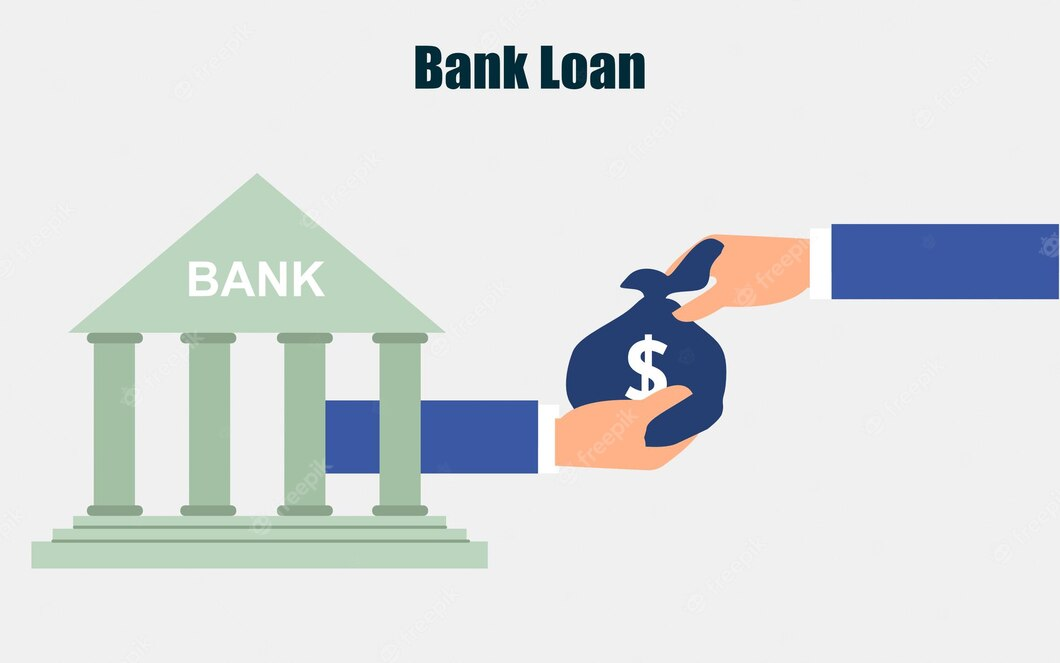

##  1. Importing useful Libraries

In [1]:
#Filtering out the warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing required libraries
#Setting the plot style
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import seaborn as sns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns',None)

## 2. Loading application_data.csv

In [3]:
#Reading application_data.csv and storing it in dataframe df1 
df1 = pd.read_csv("Downloads/Loan Case Study/application_data.csv")
#Checking first 5 records
df1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

## 3. Checking the structure of the data

In [4]:
#Checking the shape of the dataframe df1
df1.shape

(307511, 122)

In [5]:
#Checking the columns of the dataframe df1
df1.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

## 4.Data Cleaning 

In [6]:
#Finding the percentage of null values in decreasing order
round(df1.isnull().sum()/len(df1)*100,2).sort_values(ascending = False)

COMMONAREA_MEDI                 69.87
COMMONAREA_AVG                  69.87
COMMONAREA_MODE                 69.87
NONLIVINGAPARTMENTS_MODE        69.43
NONLIVINGAPARTMENTS_AVG         69.43
NONLIVINGAPARTMENTS_MEDI        69.43
FONDKAPREMONT_MODE              68.39
LIVINGAPARTMENTS_MODE           68.35
LIVINGAPARTMENTS_AVG            68.35
LIVINGAPARTMENTS_MEDI           68.35
FLOORSMIN_AVG                   67.85
FLOORSMIN_MODE                  67.85
FLOORSMIN_MEDI                  67.85
YEARS_BUILD_MEDI                66.50
YEARS_BUILD_MODE                66.50
YEARS_BUILD_AVG                 66.50
OWN_CAR_AGE                     65.99
LANDAREA_MEDI                   59.38
LANDAREA_MODE                   59.38
LANDAREA_AVG                    59.38
BASEMENTAREA_MEDI               58.52
BASEMENTAREA_AVG                58.52
BASEMENTAREA_MODE               58.52
EXT_SOURCE_1                    56.38
NONLIVINGAREA_MODE              55.18
NONLIVINGAREA_AVG               55.18
NONLIVINGARE

In [7]:
#Dropping columns with more 45% of null values
df1= df1.loc[:, (df1.isnull().sum()/len(df1)*100) < 45]

In [8]:
#Rechecking the null value percentage after dropping 
round(df1.isnull().sum()/len(df1)*100,2).sort_values(ascending = False)

OCCUPATION_TYPE                31.35
EXT_SOURCE_3                   19.83
AMT_REQ_CREDIT_BUREAU_YEAR     13.50
AMT_REQ_CREDIT_BUREAU_QRT      13.50
AMT_REQ_CREDIT_BUREAU_MON      13.50
AMT_REQ_CREDIT_BUREAU_WEEK     13.50
AMT_REQ_CREDIT_BUREAU_DAY      13.50
AMT_REQ_CREDIT_BUREAU_HOUR     13.50
NAME_TYPE_SUITE                 0.42
OBS_30_CNT_SOCIAL_CIRCLE        0.33
DEF_30_CNT_SOCIAL_CIRCLE        0.33
OBS_60_CNT_SOCIAL_CIRCLE        0.33
DEF_60_CNT_SOCIAL_CIRCLE        0.33
EXT_SOURCE_2                    0.21
AMT_GOODS_PRICE                 0.09
FLAG_DOCUMENT_7                 0.00
DAYS_LAST_PHONE_CHANGE          0.00
FLAG_DOCUMENT_2                 0.00
FLAG_DOCUMENT_3                 0.00
FLAG_DOCUMENT_4                 0.00
FLAG_DOCUMENT_5                 0.00
FLAG_DOCUMENT_6                 0.00
FLAG_DOCUMENT_11                0.00
FLAG_DOCUMENT_8                 0.00
FLAG_DOCUMENT_9                 0.00
FLAG_DOCUMENT_10                0.00
LIVE_CITY_NOT_WORK_CITY         0.00
F

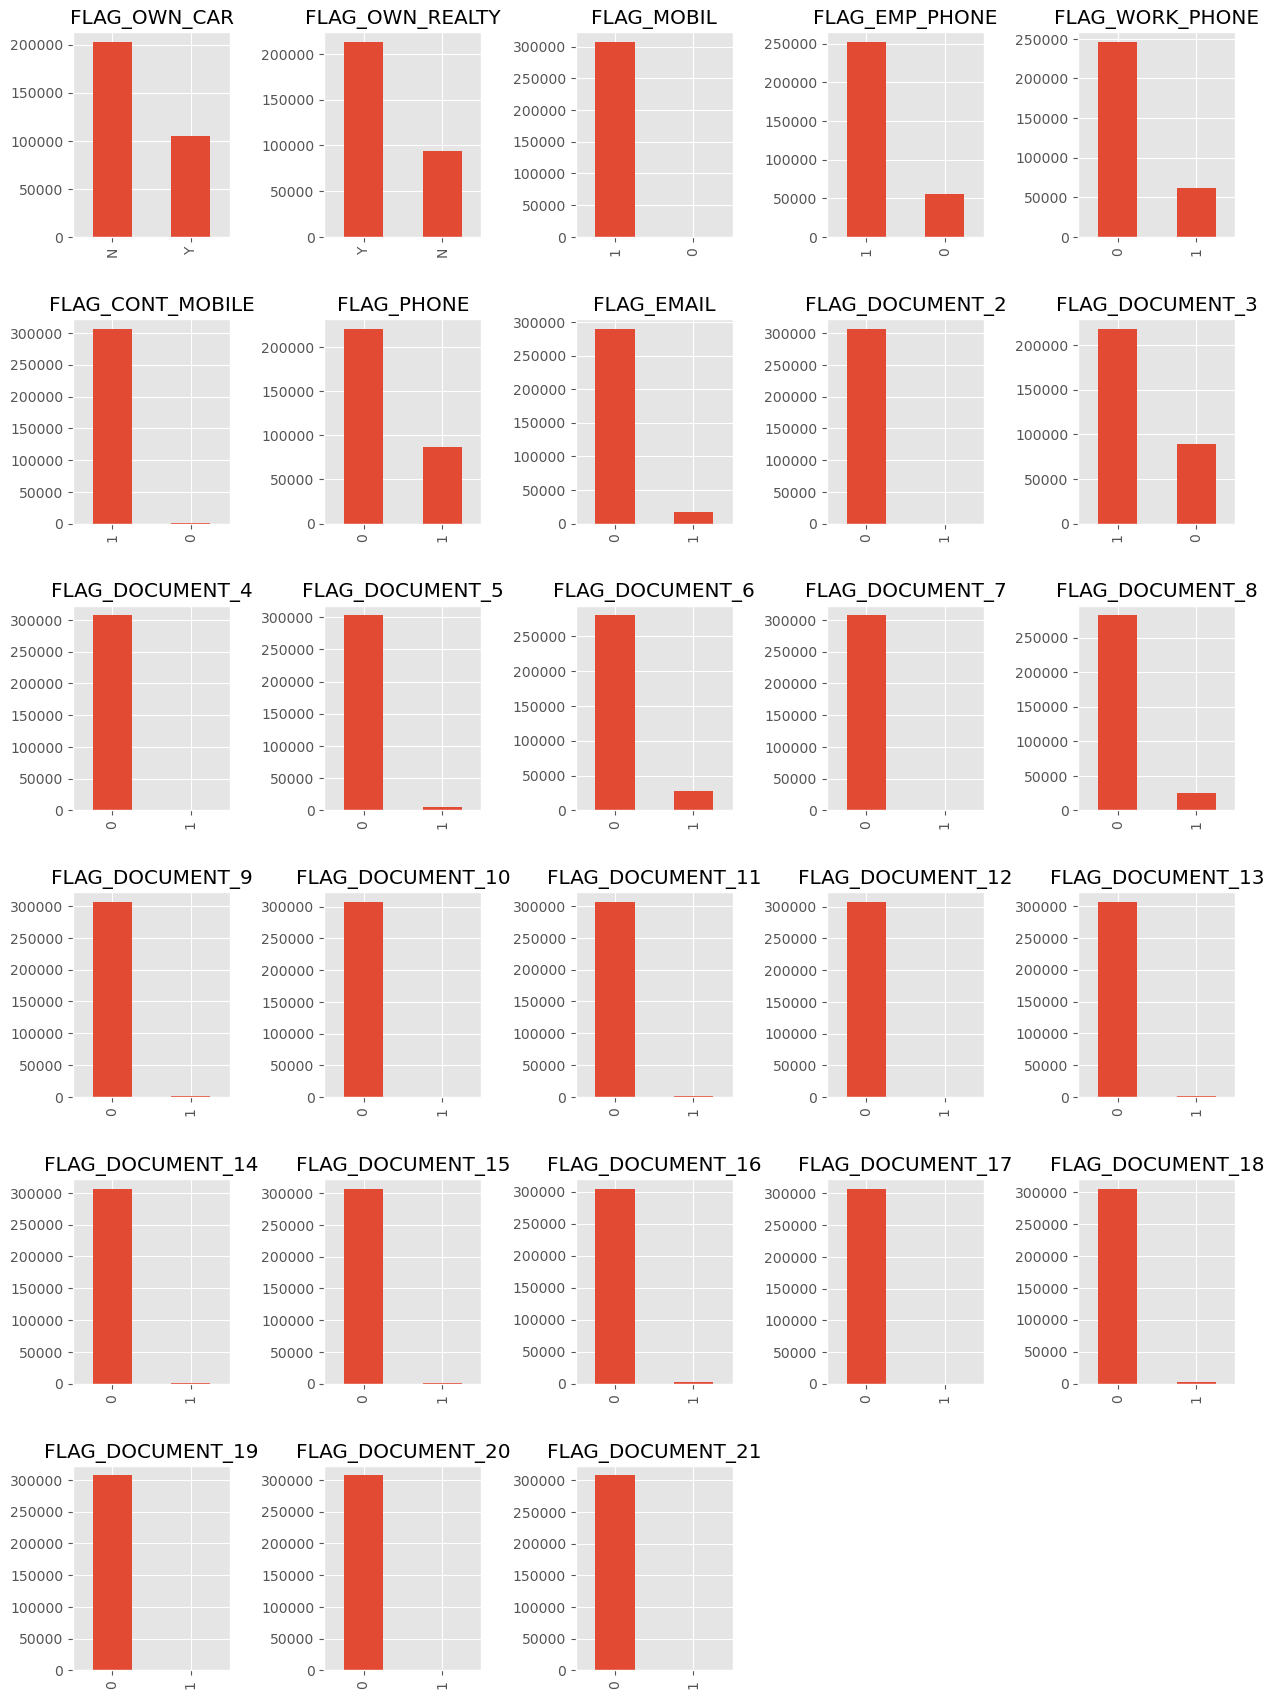

In [9]:
#Creating a list flag_cols containing all columns starts with 'FLAG' and ploting them
flag_cols = []
for i in df1.columns:
    if i.startswith("FLAG"):
        flag_cols.append(i)

j=0
plt.figure(figsize=(15,25))
for k in flag_cols:
    j=j+1
    plt.subplot(7,5,j)
    plt.subplots_adjust(hspace = 0.4, wspace = 0.6)
    df1[k].value_counts().plot(kind='bar');
    plt.title(k)

In [10]:
#Dropping all the columns that I think aren't relevant
df1.drop(['EXT_SOURCE_3','FLAG_OWN_REALTY','FLAG_OWN_CAR','EXT_SOURCE_2','FLAG_DOCUMENT_7','FLAG_DOCUMENT_2','FLAG_DOCUMENT_3',
            'FLAG_DOCUMENT_4','FLAG_DOCUMENT_5' ,'FLAG_DOCUMENT_6' ,'FLAG_DOCUMENT_11','FLAG_DOCUMENT_8','FLAG_DOCUMENT_9',
            'FLAG_DOCUMENT_10','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13','FLAG_DOCUMENT_14','FLAG_DOCUMENT_15','FLAG_DOCUMENT_16',
            'FLAG_DOCUMENT_17','FLAG_DOCUMENT_18','FLAG_DOCUMENT_19','FLAG_DOCUMENT_20','FLAG_DOCUMENT_21','FLAG_MOBIL',
            'FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE','FLAG_PHONE', 'FLAG_EMAIL'], axis=1, inplace=True)  

In [11]:
#Describing the dataframe df1
df1.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,1.422245,0.143421,1.405292,0.100049,-962.858788,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,3522.886321,1509.450419,0.910682,0.509034,0.502737,3.265832,0.122126,0.219526,0.197499,0.268444,0.421124,0.383817,2.400989,0.446698,2.379803,0.362291,826.808487,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,-24672.000000,-7197.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-4292.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,-7479.500000,-4299.000000,2.000000,2.000000,2.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1570.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,-4504.000000,-3254.000000,2.000000,2.000000,2.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-757.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,-2010.000000,-1720.000000,3.000000,2.000000,2.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,2.000000,0.000000,-274.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,0.000000,0.000000,20.000000,3.000000,3.000000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,348.000000,34.000000,344.000000,24.000000,0.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


**Observation:-**
**`DAYS_BIRTH`**,**`DAYS_EMPLOYED`**,**`DAYS_REGISTRATION`**,**`DAYS_ID_PUBLISH`** have negative values

In [12]:
#Checking the number of null values for imputation 
df1.isnull().sum().sort_values(ascending = False)

OCCUPATION_TYPE                96391
AMT_REQ_CREDIT_BUREAU_YEAR     41519
AMT_REQ_CREDIT_BUREAU_QRT      41519
AMT_REQ_CREDIT_BUREAU_MON      41519
AMT_REQ_CREDIT_BUREAU_WEEK     41519
AMT_REQ_CREDIT_BUREAU_DAY      41519
AMT_REQ_CREDIT_BUREAU_HOUR     41519
NAME_TYPE_SUITE                 1292
DEF_60_CNT_SOCIAL_CIRCLE        1021
OBS_30_CNT_SOCIAL_CIRCLE        1021
DEF_30_CNT_SOCIAL_CIRCLE        1021
OBS_60_CNT_SOCIAL_CIRCLE        1021
AMT_GOODS_PRICE                  278
AMT_ANNUITY                       12
CNT_FAM_MEMBERS                    2
DAYS_LAST_PHONE_CHANGE             1
HOUR_APPR_PROCESS_START            0
ORGANIZATION_TYPE                  0
LIVE_CITY_NOT_WORK_CITY            0
REG_CITY_NOT_WORK_CITY             0
REG_CITY_NOT_LIVE_CITY             0
LIVE_REGION_NOT_WORK_REGION        0
REG_REGION_NOT_WORK_REGION         0
REG_REGION_NOT_LIVE_REGION         0
SK_ID_CURR                         0
WEEKDAY_APPR_PROCESS_START         0
REGION_RATING_CLIENT_W_CITY        0
N

### 4.1 Handling Missing Values

In [13]:
#Checking 'OCCUPATION_TYPE' 
df1.groupby(['OCCUPATION_TYPE']).size().sort_values(ascending = False)

OCCUPATION_TYPE
Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
dtype: int64

In [14]:
#Imputing null values of OCCUPATION_TYPE with 'Laborers' and rechecking sum of null values
df1['OCCUPATION_TYPE'].fillna('Laborers' , inplace = True)
df1['OCCUPATION_TYPE'].isnull().sum()

0

In [15]:
#Describing AMT_REQ_CREDIT_BUREAU_YEAR 
df1["AMT_REQ_CREDIT_BUREAU_YEAR"].describe()

count    265992.000000
mean          1.899974
std           1.869295
min           0.000000
25%           0.000000
50%           1.000000
75%           3.000000
max          25.000000
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64

In [16]:
#Checking unique values of AMT_REQ_CREDIT_BUREAU_YEAR
df1["AMT_REQ_CREDIT_BUREAU_YEAR"].unique()

array([ 1.,  0., nan,  2.,  4.,  5.,  3.,  8.,  6.,  9.,  7., 10., 11.,
       13., 16., 12., 25., 23., 15., 14., 22., 17., 19., 18., 21., 20.])

In [17]:
#Making a list amt_rec_cols containing all column names staring with AMT_REQ_CREDIT_BUREAU_YEAR
amt_rec_cols = []
for i in df1.columns:
    if i.startswith("AMT_REQ_CREDIT_BUREAU"):
        amt_rec_cols.append(i)
amt_rec_cols

['AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR']

In [18]:
#Imputing amt_rec_cols with their medians and checking the sum of null values 
for i in amt_rec_cols:
    df1[i] = df1[i].fillna(df1[i].median())
df1[amt_rec_cols].isnull().sum()

AMT_REQ_CREDIT_BUREAU_HOUR    0
AMT_REQ_CREDIT_BUREAU_DAY     0
AMT_REQ_CREDIT_BUREAU_WEEK    0
AMT_REQ_CREDIT_BUREAU_MON     0
AMT_REQ_CREDIT_BUREAU_QRT     0
AMT_REQ_CREDIT_BUREAU_YEAR    0
dtype: int64

In [19]:
#Checking NAME_TYPE_SUITE
df1.groupby(['NAME_TYPE_SUITE']).size()

NAME_TYPE_SUITE
Children             3267
Family              40149
Group of people       271
Other_A               866
Other_B              1770
Spouse, partner     11370
Unaccompanied      248526
dtype: int64

In [20]:
#Imputing NAME_TYPE_SUITE with 'Unaccompanied' and checking the sum of null values 
df1['NAME_TYPE_SUITE'] = df1['NAME_TYPE_SUITE'].fillna('Unaccompanied')
df1['NAME_TYPE_SUITE'].isnull().sum()

0

In [21]:
#Describing 'OBS_30_CNT_SOCIAL_CIRCLE'
df1['OBS_30_CNT_SOCIAL_CIRCLE'].describe()

count    306490.000000
mean          1.422245
std           2.400989
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         348.000000
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: float64

In [22]:
#Creating a list social circle and imputing them with median
social_cir = ['DEF_60_CNT_SOCIAL_CIRCLE','OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE']
for i in social_cir:
    df1[i] = df1[i].fillna(df1[i].median())

In [23]:
#Checking sum of null values
df1[social_cir].isnull().sum()

DEF_60_CNT_SOCIAL_CIRCLE    0
OBS_30_CNT_SOCIAL_CIRCLE    0
DEF_30_CNT_SOCIAL_CIRCLE    0
OBS_60_CNT_SOCIAL_CIRCLE    0
dtype: int64

In [24]:
#Checking min max and median of AMT_GOODS_PRICE
df1['AMT_GOODS_PRICE'].agg(['min','max','median'])

min         40500.0
max       4050000.0
median     450000.0
Name: AMT_GOODS_PRICE, dtype: float64

In [25]:
#Imputing AMT_GOODS_PRICE with median and checking the sum of null values
df1['AMT_GOODS_PRICE'] = df1['AMT_GOODS_PRICE'].fillna(df1['AMT_GOODS_PRICE'].median())
df1['AMT_GOODS_PRICE'].isnull().sum()

0

In [26]:
#Describing AMT_ANNUITY
df1['AMT_ANNUITY'].describe()

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

In [27]:
#Imputing AMT_ANNUITY with median and checking the sum of null values
df1['AMT_ANNUITY'] = df1['AMT_ANNUITY'].fillna(df1['AMT_ANNUITY'].median())
df1['AMT_ANNUITY'].isnull().sum()

0

### 4.2 Handling negative values in DAYS columns

In [28]:
#Creating a list day_cols containing all column names staring with DAYS
day_cols = [i for i in df1 if i.startswith('DAYS')]
day_cols

['DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'DAYS_LAST_PHONE_CHANGE']

In [29]:
#Using abs(absolute) function on day_cols and then describing it again
df1[day_cols]= abs(df1[day_cols])
df1[day_cols].describe()

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE
count,307511.000000,307511.000000,307511.000000,307511.000000,307510.000000
mean,16036.995067,67724.742149,4986.120328,2994.202373,962.858788
std,4363.988632,139443.751806,3522.886321,1509.450419,826.808487
min,7489.000000,0.000000,0.000000,0.000000,0.000000
25%,12413.000000,933.000000,2010.000000,1720.000000,274.000000
50%,15750.000000,2219.000000,4504.000000,3254.000000,757.000000
75%,19682.000000,5707.000000,7479.500000,4299.000000,1570.000000
max,25229.000000,365243.000000,24672.000000,7197.000000,4292.000000


### 4.3 Handling XNA values

In [30]:
#Checking values of CODE_GENDER
df1['CODE_GENDER'].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [31]:
#Using lambda fucntion to change XNA to F
df1['CODE_GENDER'] = df1['CODE_GENDER'].apply(lambda x: 'F' if x == 'XNA' else x)
df1['CODE_GENDER'].value_counts()

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

In [32]:
#Checking values of ORGANIZATION_TYPE
df1.ORGANIZATION_TYPE.value_counts()

Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

In [33]:
#Droping XNA values
df1 = df1.drop(df1.loc[df1['ORGANIZATION_TYPE'] == 'XNA'].index)
df1.ORGANIZATION_TYPE.value_counts()

Business Entity Type 3    67992
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transport: type 3          1187
Industry

In [34]:
#Checking info for Not-Null Count and dtype after cleaning the data
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 252137 entries, 0 to 307510
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   252137 non-null  int64  
 1   TARGET                       252137 non-null  int64  
 2   NAME_CONTRACT_TYPE           252137 non-null  object 
 3   CODE_GENDER                  252137 non-null  object 
 4   CNT_CHILDREN                 252137 non-null  int64  
 5   AMT_INCOME_TOTAL             252137 non-null  float64
 6   AMT_CREDIT                   252137 non-null  float64
 7   AMT_ANNUITY                  252137 non-null  float64
 8   AMT_GOODS_PRICE              252137 non-null  float64
 9   NAME_TYPE_SUITE              252137 non-null  object 
 10  NAME_INCOME_TYPE             252137 non-null  object 
 11  NAME_EDUCATION_TYPE          252137 non-null  object 
 12  NAME_FAMILY_STATUS           252137 non-null  object 
 13 

## 5. Finding Outliers in the data

In [35]:
#Creating index numercial_col having all number columns
numerical_col = df1.select_dtypes(include='number').columns
len(numerical_col)

33

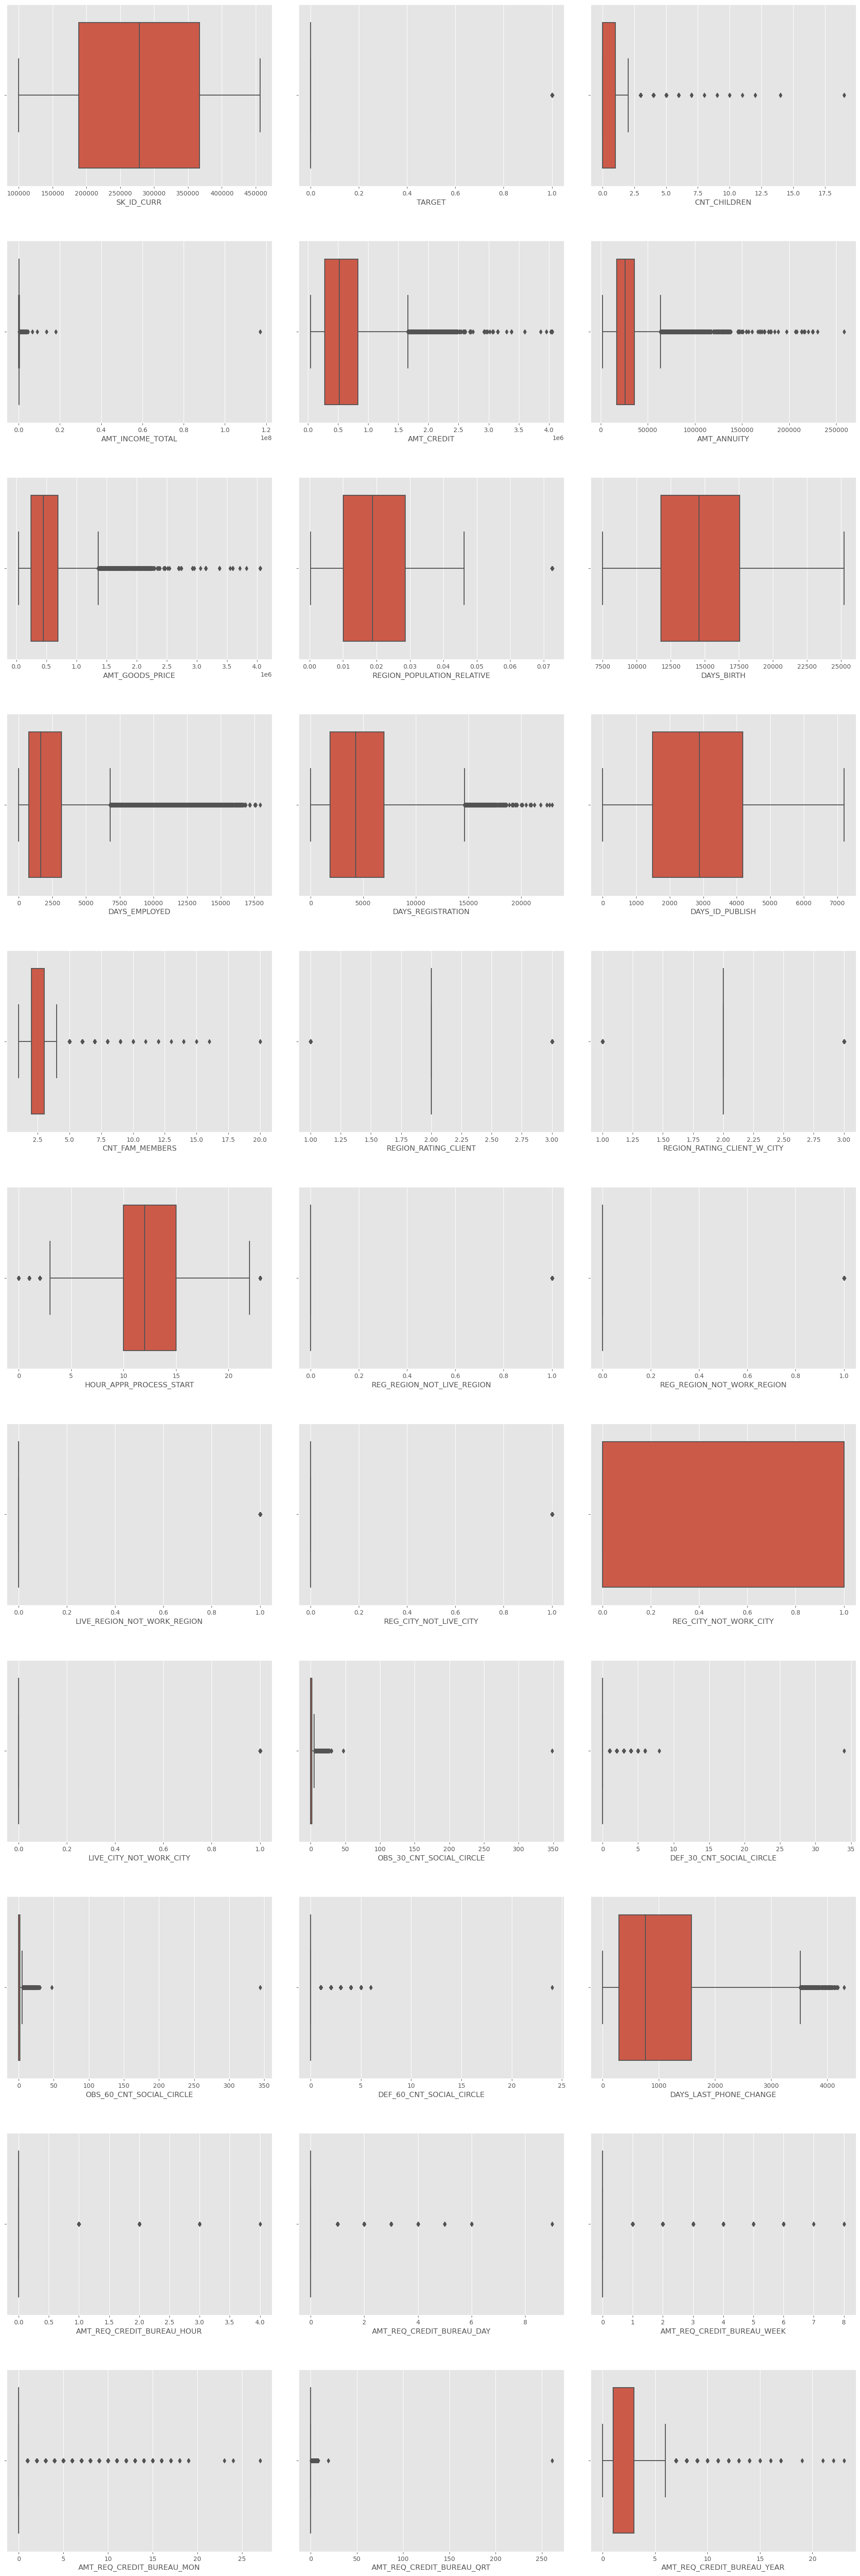

In [36]:
#Plotting box plot to check outliers
fig , axes = plt.subplots(nrows=11, ncols=3, constrained_layout=True)                 # Plot Configuration 
fig.subplots_adjust(left= 0, bottom=0, right=3, top=12, wspace= 0.1, hspace=0.3)


for ax, column in zip(axes.flatten(),numerical_col):        #Using For loop 

    sns.boxplot(df1[column],ax=ax)   #Ploting

**Observation:-**<br>
1. **`AMT_CREDIT`**, **`AMT_ANNUITY`**,**`AMT_GOODS_PRICE`**,**`DAYS_EMPLOYEED`**, **`DAYS_REGISTRATION`** have very high number of oultiers.
2. **`CNT_CHILDREN`**,**`CNT_FAM_MEMBERS`**,**`AMT_REQ_CREDIT_BUREAU_YEAR`** have outliers.
3. **`REGION_POPULATION_RELATIVE`**,**`HOUR_APPR_PROCESS_START`** have very few outliers.
4. Few columns such as **`AMT_INCOME_TOTAL`**,**`OBS_30_CNT_SOCIAL_CIRCLE`**,**`AMT_REQ_CREDIT_BUREAU`** have slim box plot but have very high number of outliers

## 6. Checking for Data Imbalance

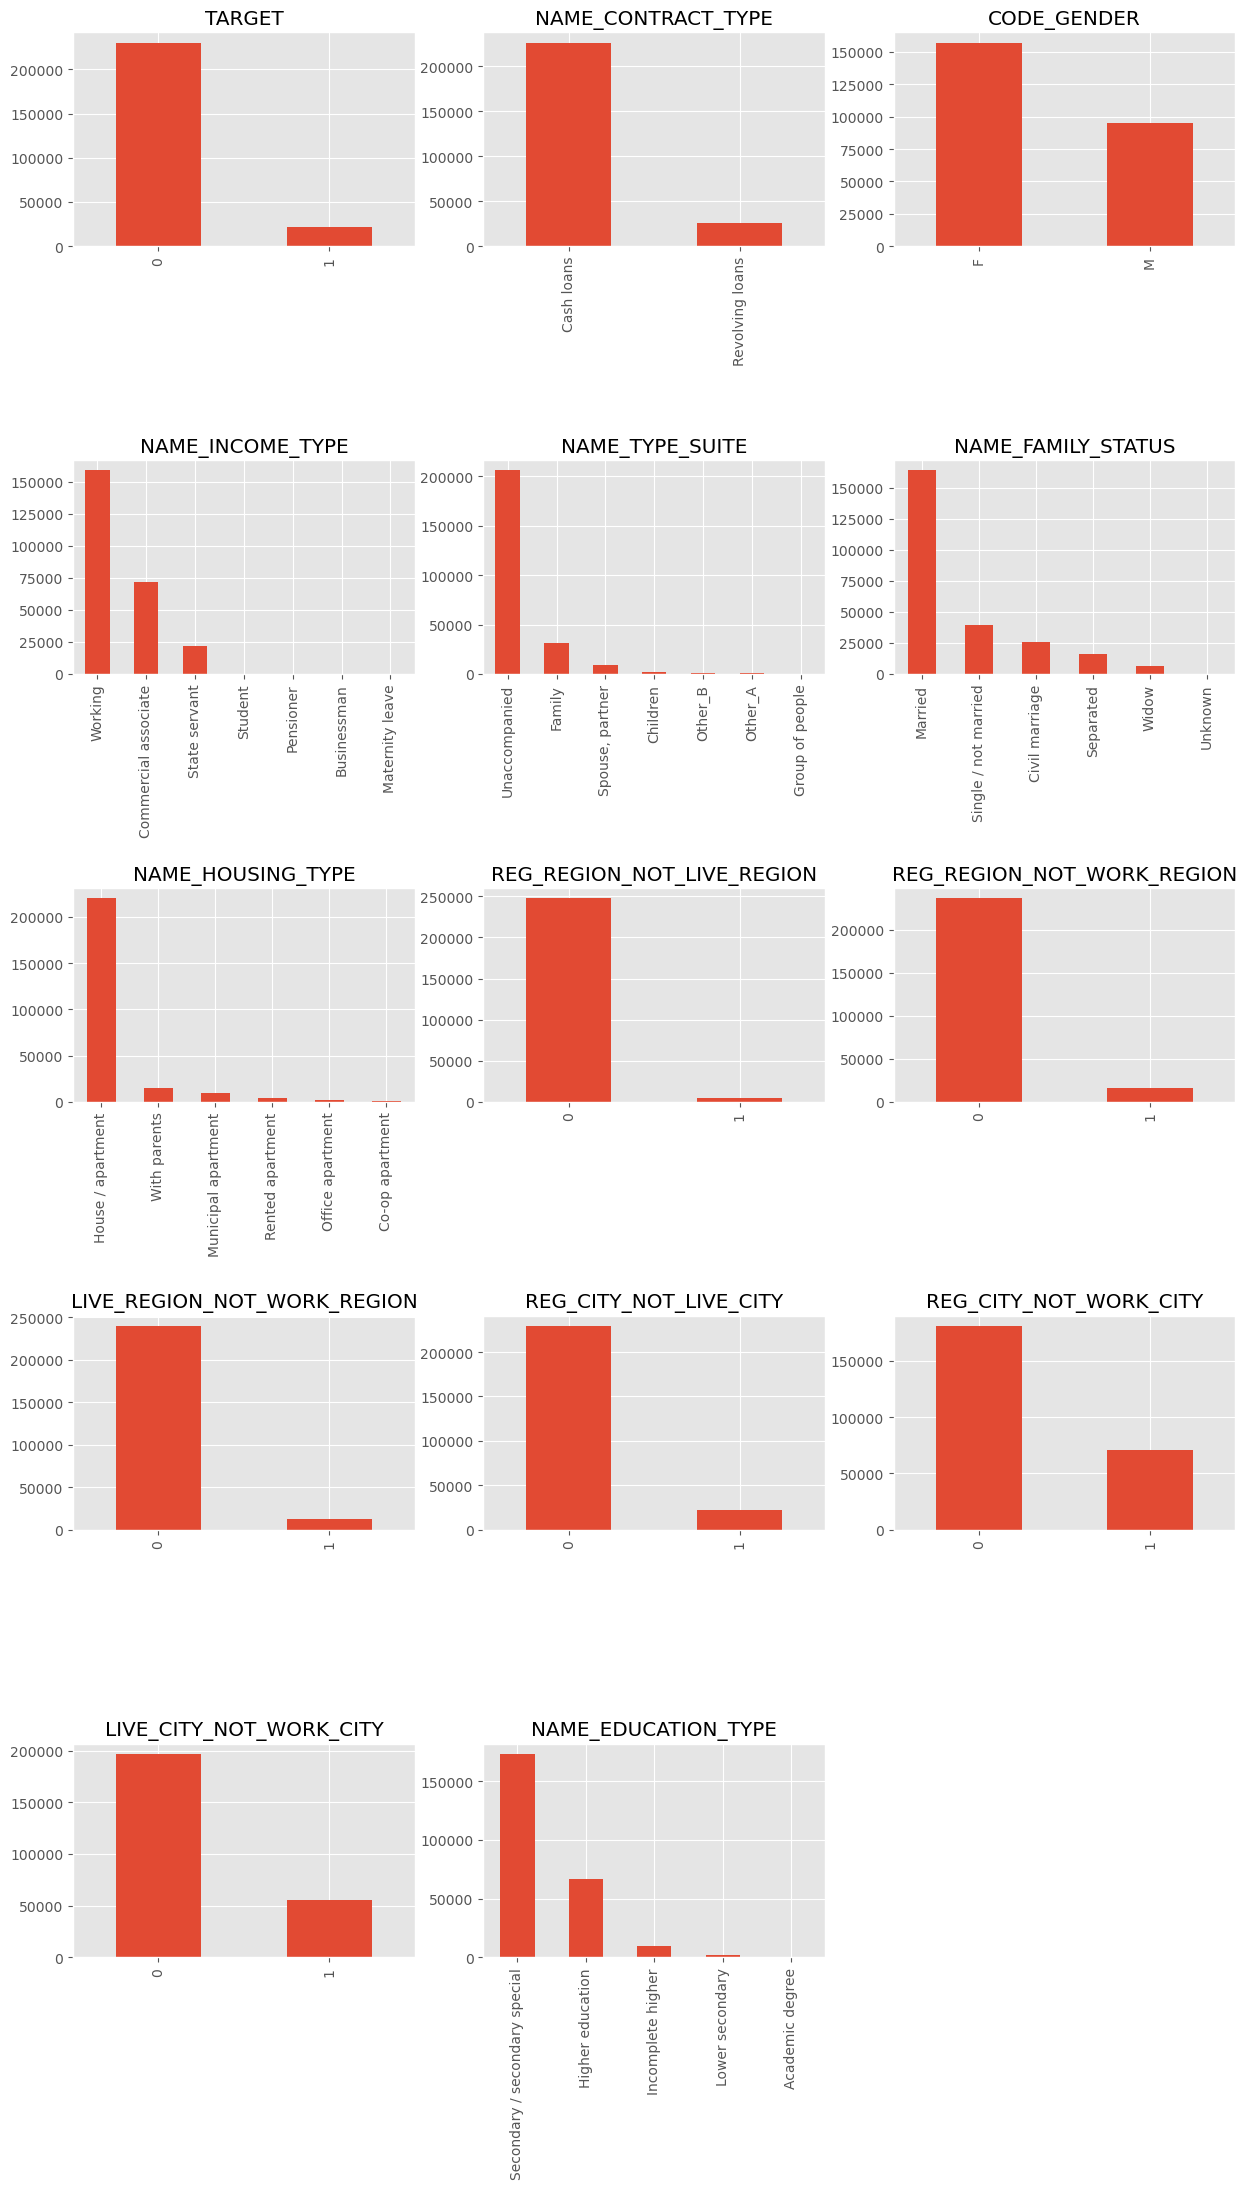

In [37]:
#Plotting to check Imbalance in data
cols = ['TARGET','NAME_CONTRACT_TYPE','CODE_GENDER','NAME_INCOME_TYPE','NAME_TYPE_SUITE','NAME_FAMILY_STATUS',
            'NAME_HOUSING_TYPE','REG_REGION_NOT_LIVE_REGION','REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION',
            'REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','LIVE_CITY_NOT_WORK_CITY','NAME_EDUCATION_TYPE']

j=0
plt.figure(figsize=(15,25))
for i in cols: #Using For Loop
    j=j+1
    plt.subplot(5, 3,j)
    plt.subplots_adjust(wspace = 0.2, hspace = 1) # Plot Configuration
    df1[i].value_counts().plot(kind='bar');
    plt.title(i)

In [38]:
#Checking percentage of each data 
for i in cols:
    print(round(df1[i].value_counts(normalize=True)*100),2)
    print('-----------------------------------------------------')

0    91.0
1     9.0
Name: TARGET, dtype: float64 2
-----------------------------------------------------
Cash loans         90.0
Revolving loans    10.0
Name: NAME_CONTRACT_TYPE, dtype: float64 2
-----------------------------------------------------
F    62.0
M    38.0
Name: CODE_GENDER, dtype: float64 2
-----------------------------------------------------
Working                 63.0
Commercial associate    28.0
State servant            9.0
Student                  0.0
Pensioner                0.0
Businessman              0.0
Maternity leave          0.0
Name: NAME_INCOME_TYPE, dtype: float64 2
-----------------------------------------------------
Unaccompanied      82.0
Family             13.0
Spouse, partner     4.0
Children            1.0
Other_B             1.0
Other_A             0.0
Group of people     0.0
Name: NAME_TYPE_SUITE, dtype: float64 2
-----------------------------------------------------
Married                 65.0
Single / not married    16.0
Civil marriage        

**Observation:-**<br>
1. Around 91% are **Non Defaulters** and 9% are **Defaulters**
2. Around 90% are **Cash loans** and 10% are **Revolving loans**
3. Around 82% are **Unaccompanied** while applying and 13% were with **Family**
4. From the above data we can say that the data in many columns have Data Imbalance

In [39]:
#Finding imbalance ratio of TARGET column
Target_Imb = df1['TARGET'].value_counts(normalize=True)*100
print ("Imbalance Ratio of 'TARGET' is ",round(Target_Imb[0]/Target_Imb[1],2))

Imbalance Ratio of 'TARGET' is  10.55


## 7. Binning of **`DAYS_BIRTH`**,**`AMT_INCOME_TOTAL`**,**`AMT_CREDIT`**

In [40]:
#Describing age as 'DAYS_BIRTH'/365
(df1['DAYS_BIRTH']//365).describe()

count    252137.000000
mean         39.963155
std          10.033179
min          20.000000
25%          32.000000
50%          39.000000
75%          48.000000
max          69.000000
Name: DAYS_BIRTH, dtype: float64

In [41]:
#Binning 'DAYS_BIRTH'/365 and Creating new column "AGE_GROUP" and checking value count percentage
df1['AGE_GROUP'] = pd.cut(df1['DAYS_BIRTH']//365, bins=[19,25,35,50,80],labels=['Very_Young','Young','Middle_Age','Senior_Citizen'])
round(df1['AGE_GROUP'].value_counts(normalize=True)*100,2)

Middle_Age        45.79
Young             30.00
Senior_Citizen    17.76
Very_Young         6.45
Name: AGE_GROUP, dtype: float64

In [42]:
#Binning 'AMT_INCOME_TOTAL' and Creating new column "INCOME_GROUP" and checking value count percentage
df1['INCOME_GROUP'] = pd.qcut(df1['AMT_INCOME_TOTAL'], q=[0,0.1,0.3,0.6,0.8,1],labels=['VeryLow','Low','Medium','High','VeryHigh'])
round(df1['INCOME_GROUP'].value_counts(normalize=True)*100,2)

Medium      36.40
VeryHigh    16.90
VeryLow     15.67
High        15.61
Low         15.43
Name: INCOME_GROUP, dtype: float64

In [43]:
#Binning 'AMT_CREDIT' and Creating new column "CREDIT_GROUP" and checking value count percentage
df1['CREDIT_GROUP'] = pd.qcut(df1['AMT_CREDIT'], q=[0.1,0.3,0.6,0.8,1],labels=['Low','Medium','High','VeryHigh'])
round(df1['CREDIT_GROUP'].value_counts(normalize=True)*100,2)

Medium      32.10
Low         24.76
VeryHigh    21.58
High        21.56
Name: CREDIT_GROUP, dtype: float64

In [44]:
#Checking count of datatypes 
df1.dtypes.value_counts()

float64     18
int64       15
object      10
category     1
category     1
category     1
dtype: int64

## 8. Univariate Analysis

In [45]:
#Creating index obj_cols having all object columns
obj_cols = df1.select_dtypes(include=['object']).columns
obj_cols

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START',
       'ORGANIZATION_TYPE'],
      dtype='object')

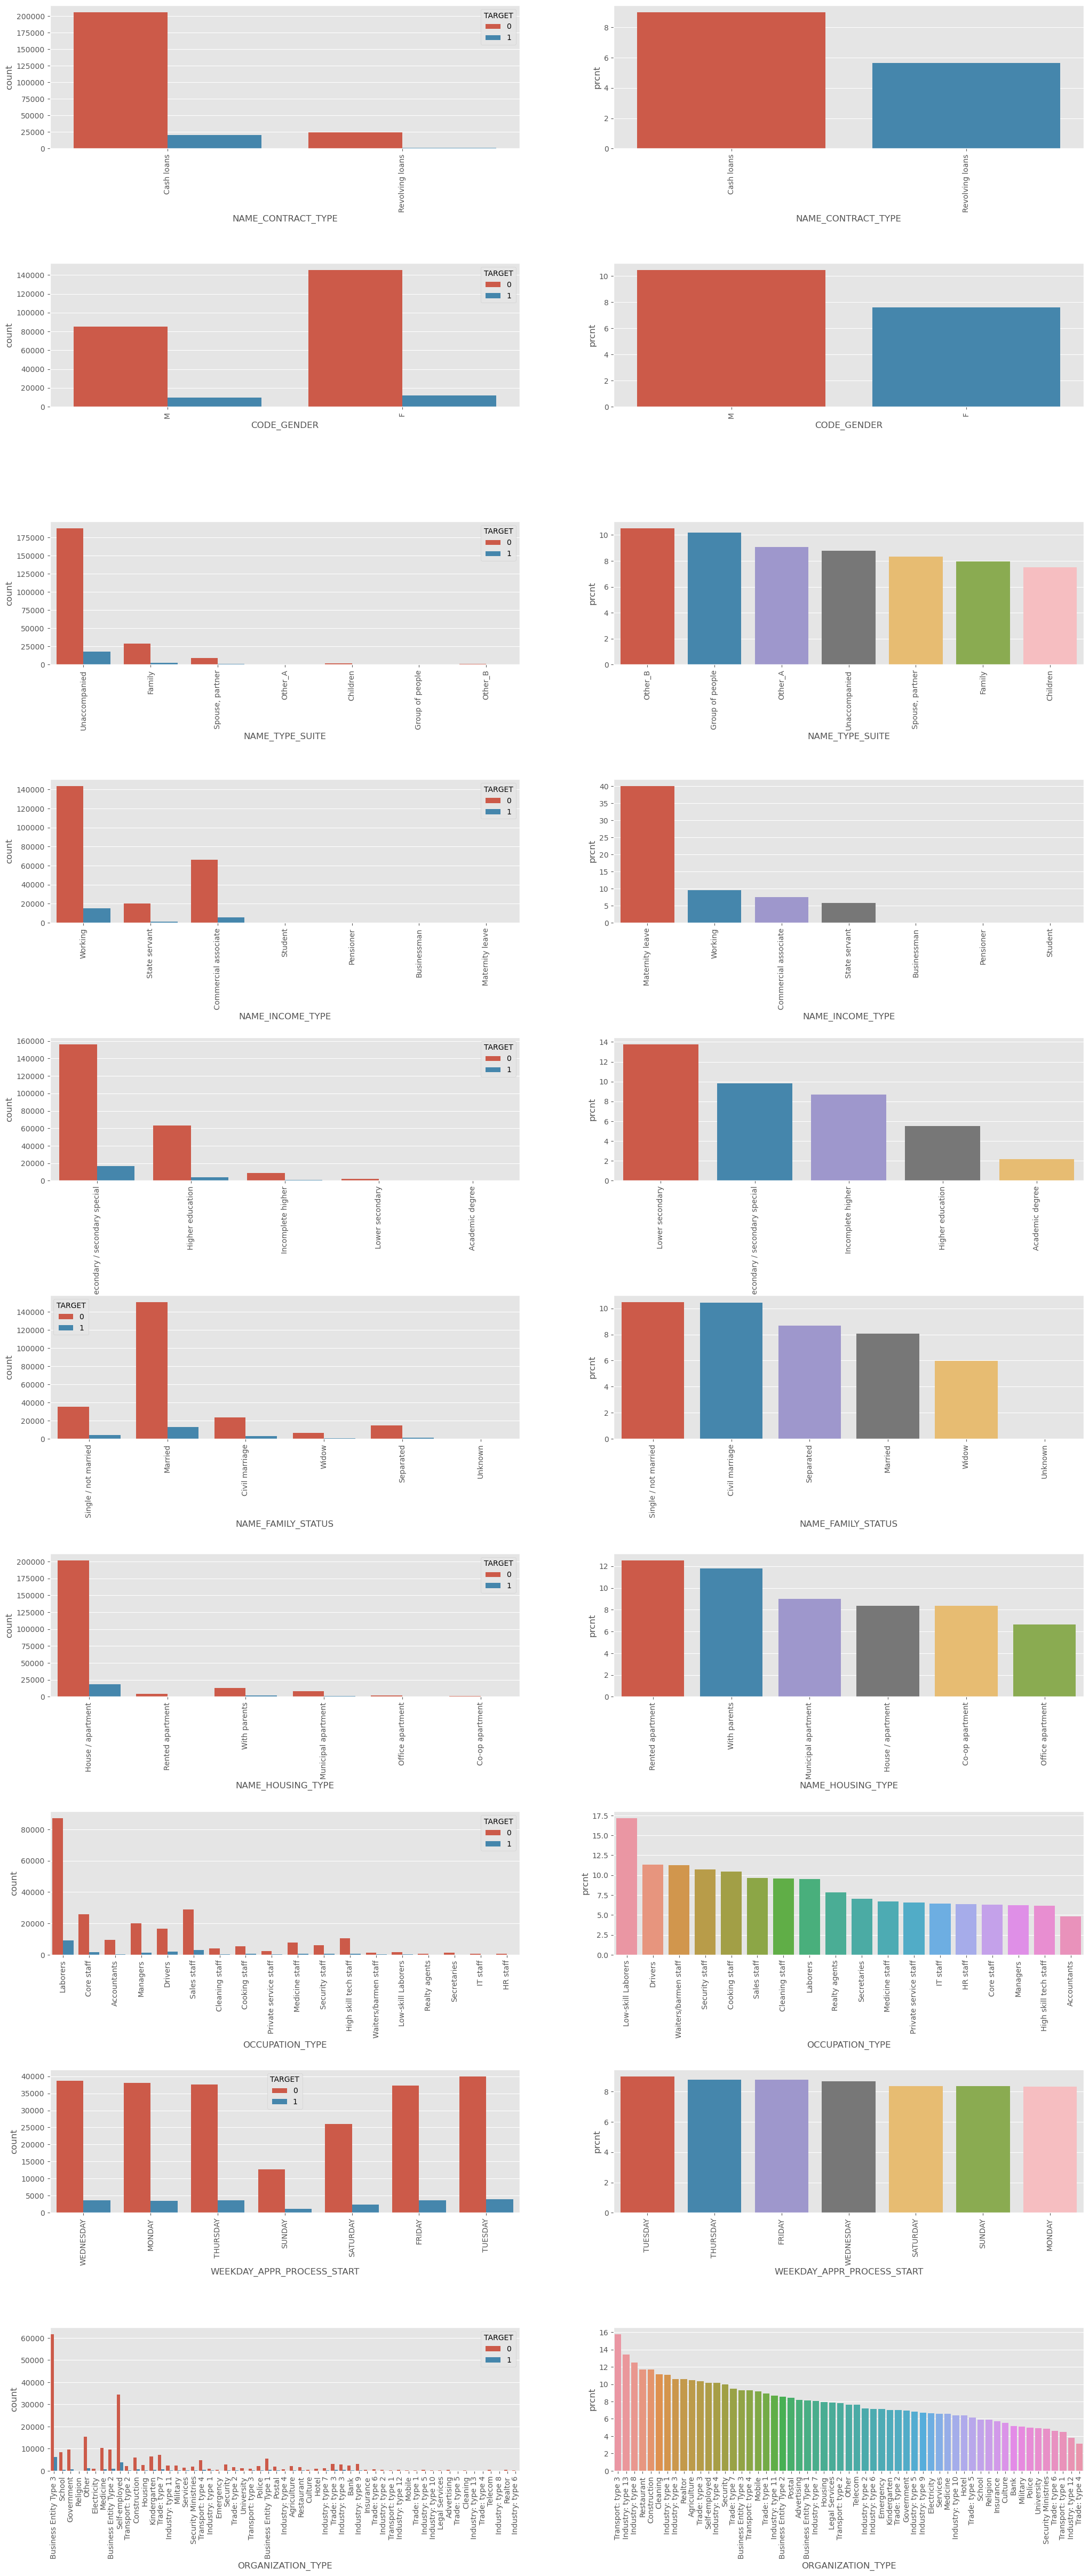

In [46]:
#Plotting for Univariate Analysis
plt.figure(figsize=(25,60))
for i, var in enumerate(obj_cols):       #Using For Loop    
    

    plt.subplot(10,2,2*i+1)               # Plot Configuration
    plt.subplots_adjust(hspace=0.8)
    sns.countplot(data=df1,x=var,hue='TARGET')
    plt.xticks(rotation=90)
    
    uni_var = df1[[var,'TARGET']].groupby([var], as_index=False).mean().sort_values(by='TARGET',ascending=False)
    uni_var['prcnt'] = uni_var['TARGET']*100
    
    plt.subplot(10,2,2*i+2)               # Plot Configuration
    plt.subplots_adjust(hspace=0.8)
    sns.barplot(data=uni_var,x=var,y='prcnt')
    plt.xticks(rotation=90)    
    

**Observation:-**<br>
1. Those who have **`Cash Loans`** are less likely to default.
2. **`Females`** are less likely to default and most loan were taken by females.
3. People accompanied by **`Other_B`** have highest percentage of deafult but number of loans are so less that are negligible.<br>
   And **`Unaccompanied`** have default percentage of around ~ 8.5% .
4. **`Working`**, **`Commercial Associate`** and **`State Servent`** are very less likely to default.
5. **`Secondary/Secondary Special`** have default percentage around 10% which is good but **`Higher Education`** is very less likely to default.
6. **`Married`** are less likely to default.
7. People having **`House/Apartment`** are less likely to default.
8. **`Labourers`**,**`Sales Staff`** are less likely to default . **`Core Staff`** and **`Manager`** is very less likely to deafult.
9. **`Business Entity Type 3`**, **`Self Employed`** are less likely to default.


## 9. Segmented Univarite Analysis

In [47]:
#Creating two dataframe on the basis of TARGET
df1_t0 = df1.loc[df1["TARGET"]==0]
df1_t1 = df1.loc[df1["TARGET"]==1]

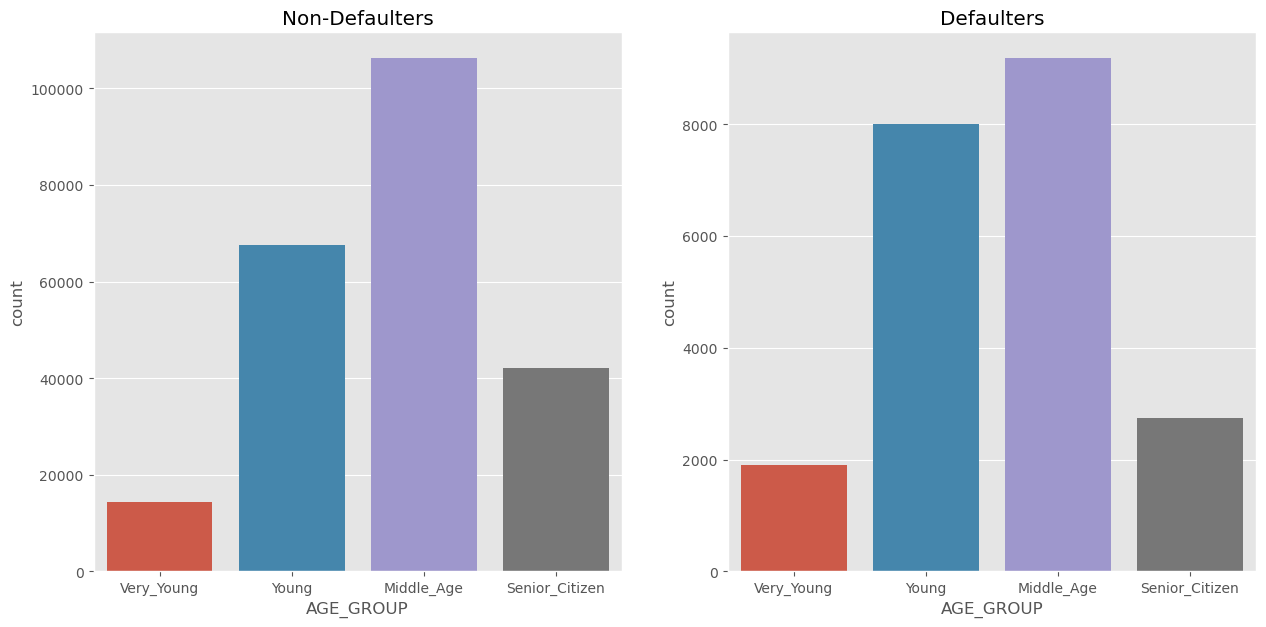

In [48]:
#Creating plot for Segmented Univarite Analysis of AGE_GROUP
plt.figure(figsize=(15,7)) 
plt.subplot(1,2,1)
sns.countplot(x='AGE_GROUP',data=df1_t0)
plt.title('Non-Defaulters')

plt.subplot(1,2,2)
sns.countplot(x='AGE_GROUP',data=df1_t1)
plt.title('Defaulters')

plt.show()

**Observation:-**<br>
- Both graph approximately have same pattern but there is high difference between their counts.
- **Defaulters -**  **`Middle_Age`** is likely to default and **`Very_Young`** is very less likely to default
- **Non Defaulters -**  **`Middle_Age`** have highest number of non defaulters followed by **`Young`**,**`Senior_Citizen`** and lastly **`Very_Young`**

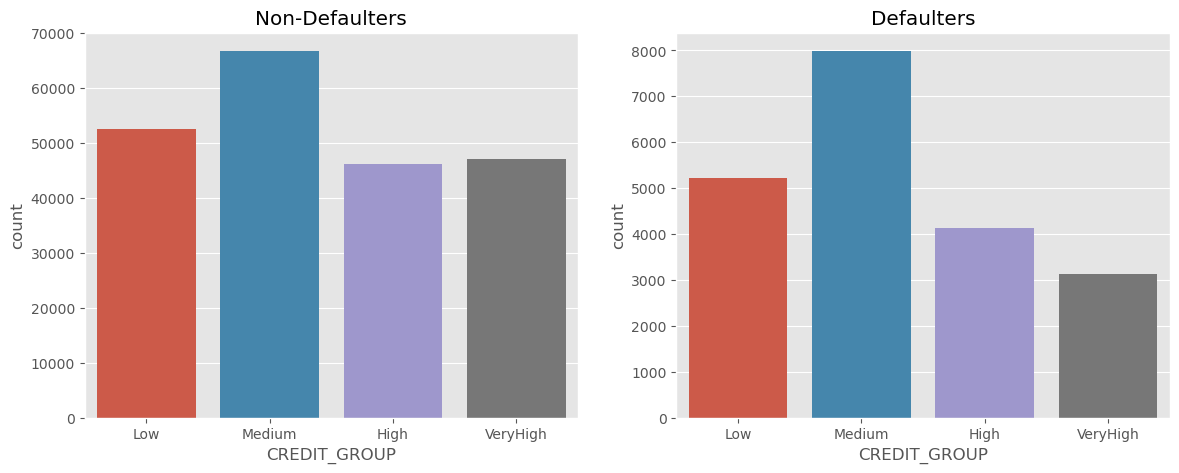

In [49]:
#Creating plot for Segmented Univarite Analysis of CREDIT_GROUP
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)    
sns.countplot(x = 'CREDIT_GROUP', data = df1_t0)
plt.title('Non-Defaulters')

plt.subplot(1,2,2) 
sns.countplot(x = 'CREDIT_GROUP',data = df1_t1)
plt.title('Defaulters')
plt.show()

**Observation:-**<br>
- **Non Defaulters -** Surprisingly **`Medium`** CREDIT_GROUP have more number of non defaulters than **`High`**,**`VeryHigh`**.
- **Defaulters -** **`Medium`** CREDIT_GROUP have highest number of defaulters more than **`Low`** CREDIT_GROUP.

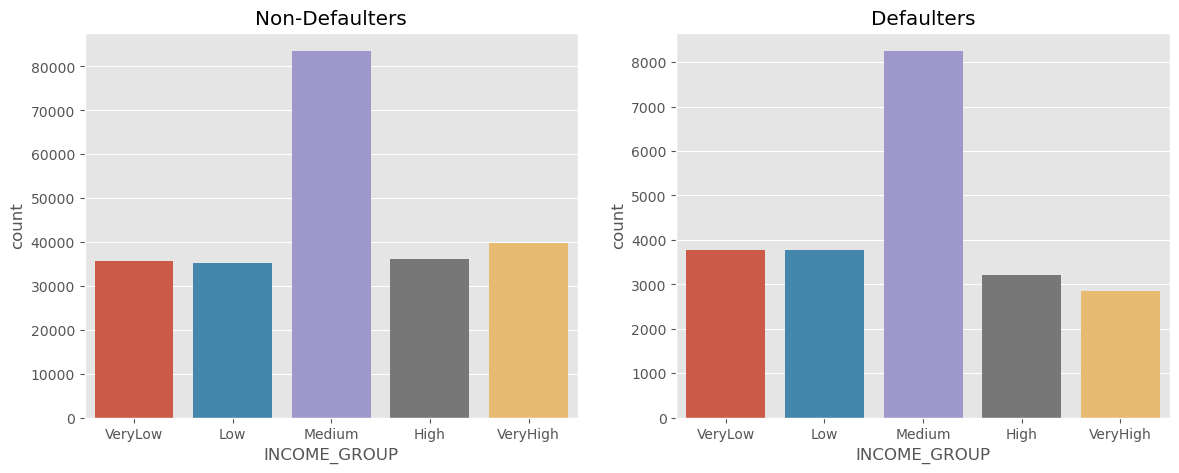

In [50]:
#Creating plot for Segmented Univarite Analysis of INCOME_GROUP
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)    
ax = sns.countplot(x = 'INCOME_GROUP',data = df1_t0)
plt.title('Non-Defaulters')

plt.subplot(1,2,2) 
ax = sns.countplot(x = 'INCOME_GROUP',data=df1_t1)
plt.title('Defaulters')
plt.show()

**Observation:-**<br>
- **Non Defaulters -** **`Medium`** INCOME_GROUP have highest number of non defaulters higher than **`High`** and **`VeryHigh`**.
- **Defaulters -** **`Medium`** INCOME_GROUP have highest number of defaulters higher than **`Low`** and **`VeryLow`**.

## 10. Bivariate Analysis

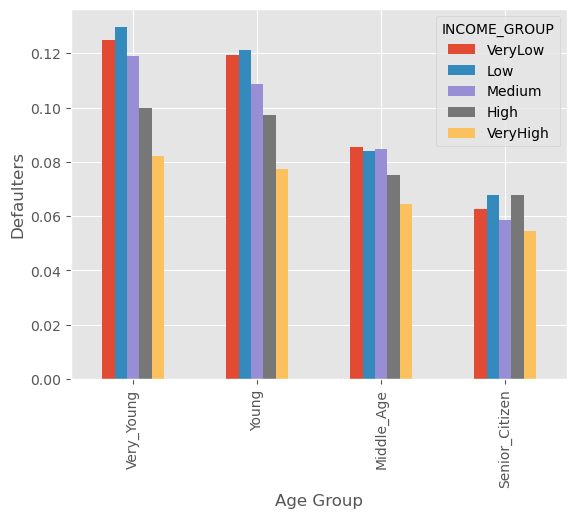

In [51]:
#Creating plot for AGE_GROUP VS INCOME_GROUP
df1.pivot_table(values='TARGET',index='AGE_GROUP',columns='INCOME_GROUP',aggfunc='mean').plot.bar()
plt.xlabel('Age Group')
plt.ylabel('Defaulters')
plt.show()

**Observation:-**<br>
- **`Low`** Income group is more likely to default in all age groups higher than **`VeryLow`**.
- As expected **`VeryHigh`** Income  group is less likely to default in all age groups.

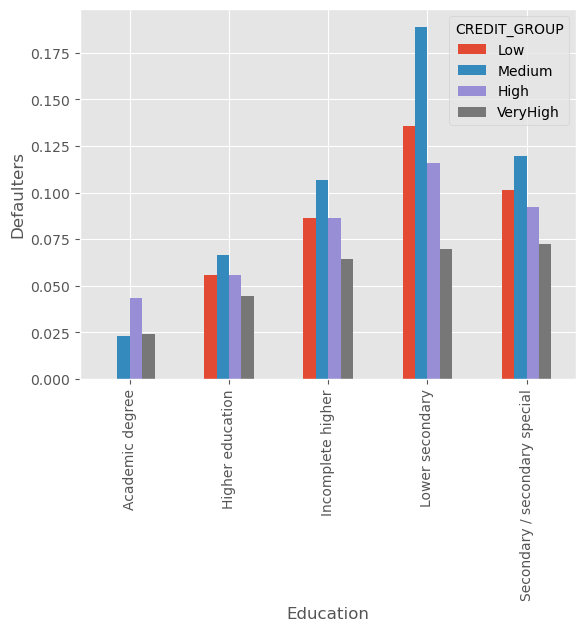

In [52]:
#Creating plot EDUCATION VS CREDIT GROUP
df1.pivot_table(values='TARGET',index='NAME_EDUCATION_TYPE',columns='CREDIT_GROUP',aggfunc='mean').plot.bar()
plt.xlabel('Education')
plt.ylabel('Defaulters')
plt.show()

**Observation:-**<br>
- **`Medium`** Credit group is more likely to default in all education type except **`Academic degree`**.
- **`VeryHigh`** Credit  group is less likely to default in all education type.
- There are no **`Low`** Credit group defaulters in **`Academic degree`**.

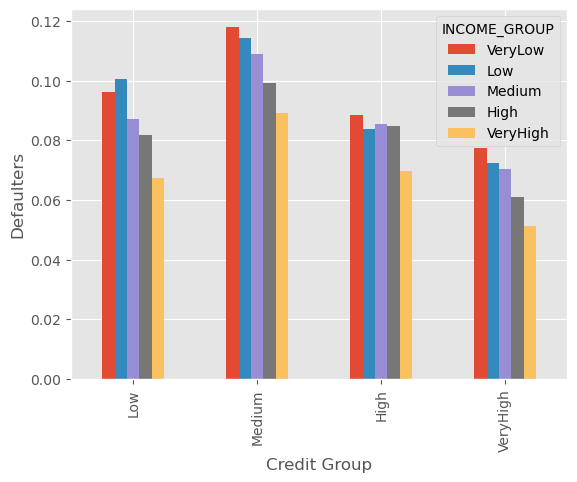

In [53]:
#Creating plot for CREDIT_GROUP VS INCOME_GROUP
df1.pivot_table(values='TARGET',index='CREDIT_GROUP',columns='INCOME_GROUP',aggfunc='mean').plot.bar()
plt.xlabel('Credit Group')
plt.ylabel('Defaulters')
plt.show()

**Observation:-**<br>
- **`Medium`** Credit group is more likely to default in all income groups.
- **`VeryHigh`** Credit  group is less likely to default in all income groups.


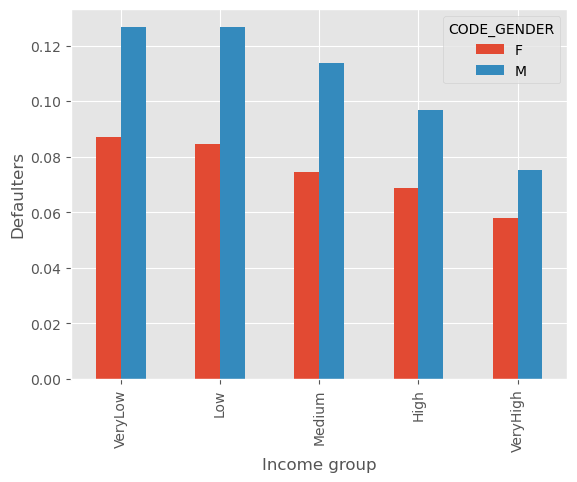

In [54]:
#Creating plot for INCOME_GROUP VS CODE_GENDER
df1.pivot_table(values='TARGET',index='INCOME_GROUP',columns='CODE_GENDER',aggfunc='mean').plot.bar()
plt.xlabel('Income group')
plt.ylabel('Defaulters')
plt.show()

**Observation:-**<br>
- **`Males`** are more likely to default than **`Females`** in all income group.
- **`Males`** in **`VeryLow`** and **`Low`** have same defaulting chance.

## 11. Top 10 Correlation 

### 11.1 Top 10 Correlation for Non Defaulters

In [55]:
#Finding Top 10 Correlation for TARGET = 0 
tar_0 = df1[df1['TARGET']==0].drop(['TARGET'],axis=1)

corr_0 = tar_0.corr()
corr_0_uppr = corr_0.where(np.triu(np.ones(corr_0.shape), k=1).astype(np.bool))
corr_0_unstack = corr_0_uppr.unstack().reset_index().rename(columns={'level_0':'Var1','level_1':'Var2',0:'Corr'})
corr_0_unstack.dropna(subset = ['Corr'], inplace = True)
corr_0_unstack.sort_values(by = 'Corr', ascending = False).head(10)

,Var1,Var2,Corr
757,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,0.998492
163,AMT_GOODS_PRICE,AMT_CREDIT,0.986471
428,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,0.949504
353,CNT_FAM_MEMBERS,CNT_CHILDREN,0.893276
790,DEF_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,0.861492
560,LIVE_REGION_NOT_WORK_REGION,REG_REGION_NOT_WORK_REGION,0.860421
659,LIVE_CITY_NOT_WORK_CITY,REG_CITY_NOT_WORK_CITY,0.820828
164,AMT_GOODS_PRICE,AMT_ANNUITY,0.766655
131,AMT_ANNUITY,AMT_CREDIT,0.762103
527,REG_REGION_NOT_WORK_REGION,REG_REGION_NOT_LIVE_REGION,0.461596


### 11.2 Top 10 Correlation for Non Defaulters

In [56]:
#Finding Top 10 Correlation for TARGET = 1 
tar_1 = df1[df1['TARGET']==1].drop(['TARGET'],axis=1)

corr_1 = tar_1.corr()
corr_1_uppr = corr_1.where(np.triu(np.ones(corr_1.shape), k=1).astype(np.bool))
corr_1_unstack = corr_1_uppr.unstack().reset_index().rename(columns={'level_0':'Var1','level_1':'Var2',0:'Corr'})
corr_1_unstack.dropna(subset = ['Corr'], inplace = True)
corr_1_unstack.sort_values(by = 'Corr', ascending = False).head(10)

,Var1,Var2,Corr
757,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,0.998289
163,AMT_GOODS_PRICE,AMT_CREDIT,0.982464
428,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,0.956531
353,CNT_FAM_MEMBERS,CNT_CHILDREN,0.893829
790,DEF_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,0.867983
560,LIVE_REGION_NOT_WORK_REGION,REG_REGION_NOT_WORK_REGION,0.846872
659,LIVE_CITY_NOT_WORK_CITY,REG_CITY_NOT_WORK_CITY,0.768247
164,AMT_GOODS_PRICE,AMT_ANNUITY,0.748940
131,AMT_ANNUITY,AMT_CREDIT,0.748708
527,REG_REGION_NOT_WORK_REGION,REG_REGION_NOT_LIVE_REGION,0.506747


## 12. Loading previous_application.csv

In [57]:
#Reading previous_application.csv and storing it in dataframe df2 
df2 = pd.read_csv("Downloads/Loan Case Study/previous_application.csv")
#Checking first 5 records
df2.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


## 13. Checking the structure of the data

In [58]:
#Checking shape of the dataframe df2
df2.shape

(1670214, 37)

## 14. Data Cleaning

### 14.1 Handling XNA and XAP values

In [59]:
#Replacing all the XNA and XAP to null
df2.replace('XNA',np.nan,inplace=True)
df2.replace('XAP',np.nan,inplace=True)

### 14.2 Checking for Null Values

In [60]:
#Finding the percentage of null values in decreasing order
round(df2.isnull().sum()/len(df2)*100,2).sort_values(ascending = False)

RATE_INTEREST_PRIMARY          99.64
RATE_INTEREST_PRIVILEGED       99.64
NAME_CASH_LOAN_PURPOSE         95.83
CODE_REJECT_REASON             81.33
NAME_PRODUCT_TYPE              63.68
NAME_GOODS_CATEGORY            56.93
AMT_DOWN_PAYMENT               53.64
RATE_DOWN_PAYMENT              53.64
NAME_SELLER_INDUSTRY           51.23
NAME_TYPE_SUITE                49.12
NFLAG_INSURED_ON_APPROVAL      40.30
DAYS_TERMINATION               40.30
DAYS_LAST_DUE                  40.30
DAYS_LAST_DUE_1ST_VERSION      40.30
DAYS_FIRST_DUE                 40.30
DAYS_FIRST_DRAWING             40.30
NAME_PAYMENT_TYPE              37.56
NAME_YIELD_GROUP               30.97
AMT_GOODS_PRICE                23.08
CNT_PAYMENT                    22.29
AMT_ANNUITY                    22.29
NAME_PORTFOLIO                 22.29
NAME_CLIENT_TYPE                0.12
NAME_CONTRACT_TYPE              0.02
PRODUCT_COMBINATION             0.02
DAYS_DECISION                   0.00
AMT_APPLICATION                 0.00
A

### 14.3 Dropping Columns

In [61]:
#Dropping columns with more 40% of null values
df2= df2.loc[:, (df2.isnull().sum()/len(df2)*100) < 40]

In [62]:
#Dropping all the columns that I think aren't relevant
df2.drop(['HOUR_APPR_PROCESS_START','WEEKDAY_APPR_PROCESS_START','FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY']
         ,axis=1,inplace= True)

In [63]:
#Rechecking the null value percentage after dropping 
round(df2.isnull().sum()/len(df2)*100,2).sort_values(ascending = False)

NAME_PAYMENT_TYPE       37.56
NAME_YIELD_GROUP        30.97
AMT_GOODS_PRICE         23.08
NAME_PORTFOLIO          22.29
AMT_ANNUITY             22.29
CNT_PAYMENT             22.29
NAME_CLIENT_TYPE         0.12
PRODUCT_COMBINATION      0.02
NAME_CONTRACT_TYPE       0.02
SELLERPLACE_AREA         0.00
CHANNEL_TYPE             0.00
SK_ID_PREV               0.00
SK_ID_CURR               0.00
NAME_CONTRACT_STATUS     0.00
AMT_CREDIT               0.00
AMT_APPLICATION          0.00
DAYS_DECISION            0.00
dtype: float64

### 14.4 Handling missing values

In [64]:
#Checking NAME_PAYMENT_TYPE
df2.groupby(['NAME_PAYMENT_TYPE']).size()

NAME_PAYMENT_TYPE
Cash through the bank                        1033552
Cashless from the account of the employer       1085
Non-cash from your account                      8193
dtype: int64

In [65]:
#Imputing null values of NAME_PAYMENT_TYPE with 'Cash through the bank' and rechecking sum of null values
df2['NAME_PAYMENT_TYPE'].fillna('Cash through the bank' , inplace = True)
df2['NAME_PAYMENT_TYPE'].isnull().sum()

0

In [66]:
#Checking NAME_YIELD_GROUP
df2.groupby(['NAME_YIELD_GROUP']).size()

NAME_YIELD_GROUP
high          353331
low_action     92041
low_normal    322095
middle        385532
dtype: int64

In [67]:
#Imputing null values of NAME_YIELD_GROUP with 'middle' and rechecking sum of null values
df2['NAME_YIELD_GROUP'].fillna('middle' , inplace = True)
df2['NAME_YIELD_GROUP'].isnull().sum()

0

In [68]:
#Checking NAME_PORTFOLIO
df2.groupby(['NAME_PORTFOLIO']).size()

NAME_PORTFOLIO
Cards    144985
Cars        425
Cash     461563
POS      691011
dtype: int64

In [69]:
#Imputing null values of NAME_PORTFOLIO with 'POS' and rechecking sum of null values
df2['NAME_PORTFOLIO'].fillna('POS' , inplace = True)
df2['NAME_PORTFOLIO'].isnull().sum()

0

In [70]:
#Imputing AMT_GOODS_PRICE,AMT_ANNUITY,CNT_PAYMENT
df2['AMT_GOODS_PRICE'].fillna(df2.AMT_GOODS_PRICE.median(),inplace = True)

df2['AMT_ANNUITY'].fillna(df2.AMT_ANNUITY.mode()[0],inplace = True)

df2['CNT_PAYMENT'].fillna(df2.CNT_PAYMENT.mode()[0],inplace = True)

In [71]:
#Using abs function to correct negative values
df2['DAYS_DECISION'] = abs(df2['DAYS_DECISION'])

In [72]:
#Creating index numercial_col2 having all number columns
numerical_col2 = df2.select_dtypes(include='number').columns
len(numerical_col2)

9

## 15. Checking for Outliers in the data

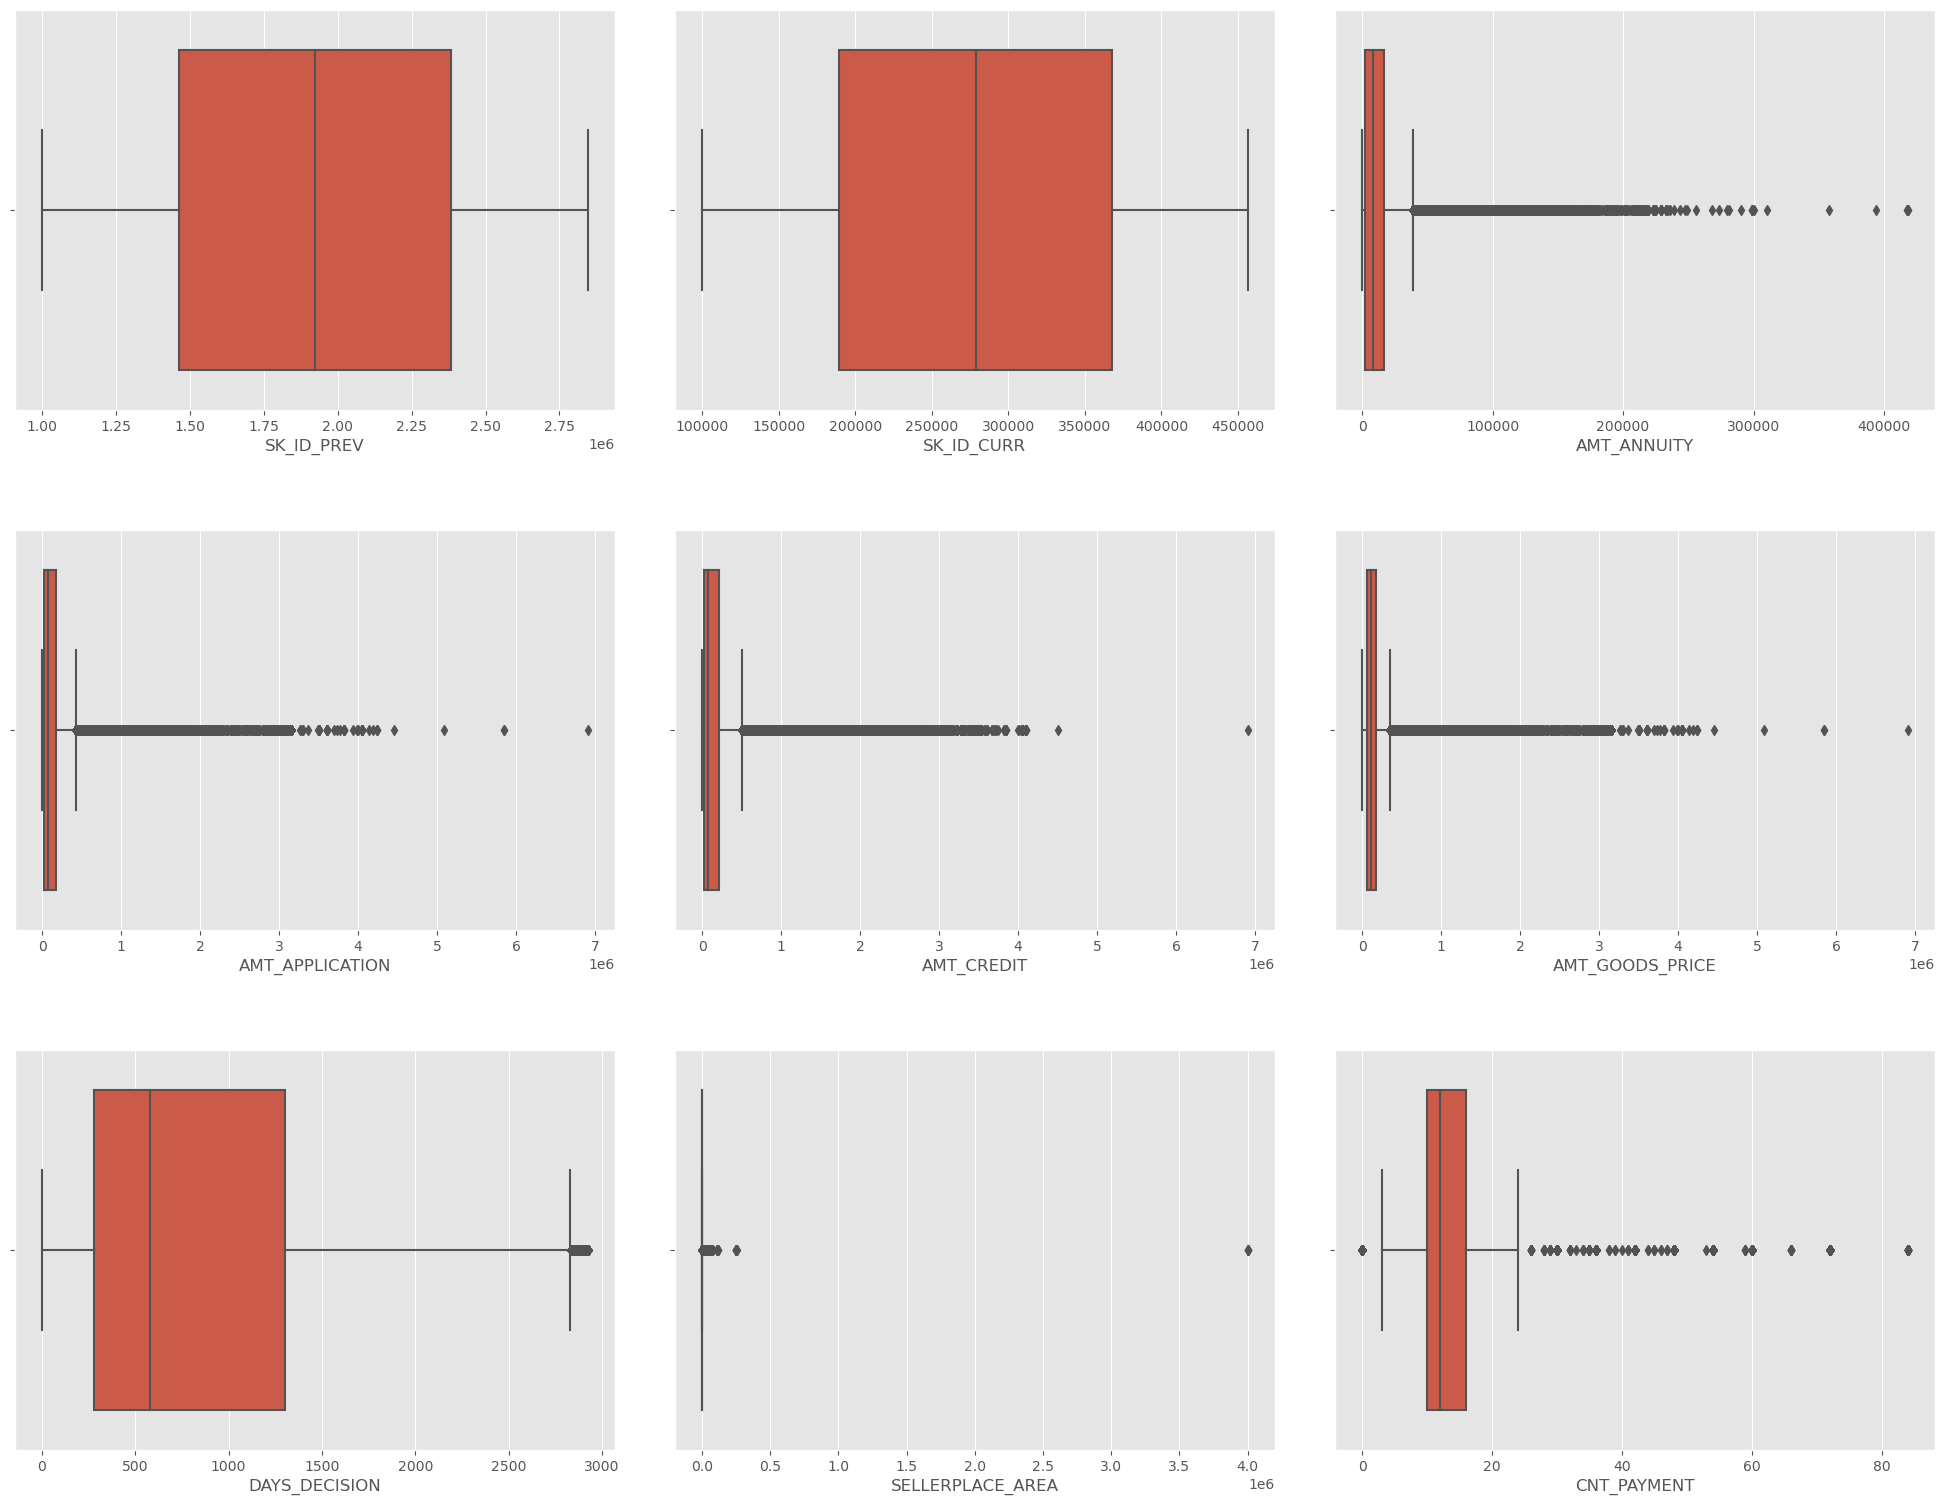

In [73]:
#Plotting box plot to check outliers
fig , axes = plt.subplots(nrows=3, ncols=3, constrained_layout=True)                 # Plot Configuration 
fig.subplots_adjust(left= 0, bottom=0, right=3, top=3, wspace= 0.1, hspace=0.3)


for ax, column in zip(axes.flatten(),numerical_col2):        #Using For loop 

    sns.boxplot(df2[column],ax=ax)   #Ploting

**Observation:-**<br>
- **`AMT_ANNUITY`**,**`AMT_APPLICATION`**,**`AMT_CREDIT`**,**`AMT_GOODS_PRICE`**,**`CNT_PAYMENT`** have very large number of outliers.

## 16. Checking for Data Imbalance

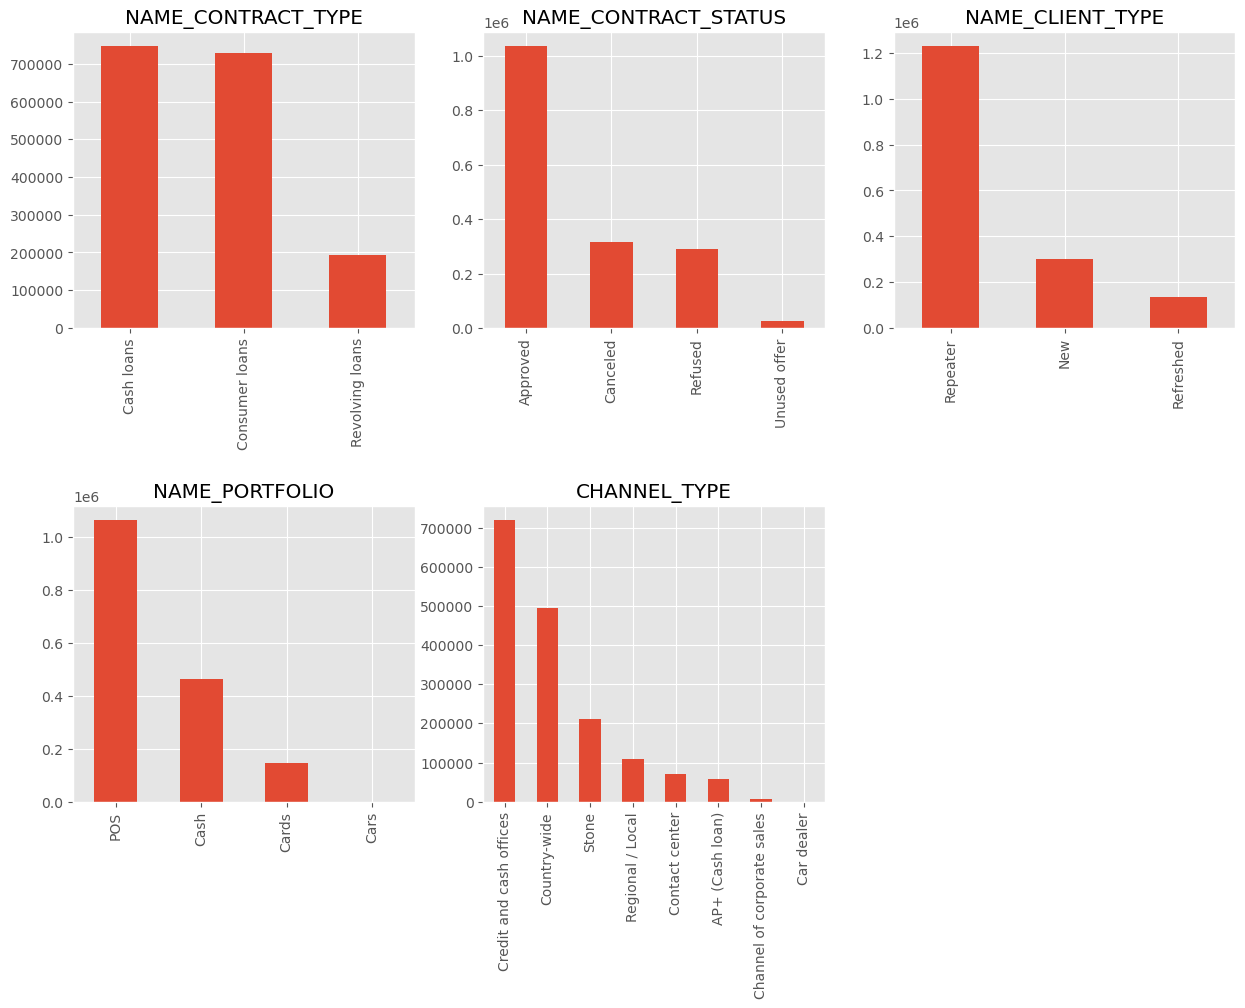

In [74]:
#Plotting to check Imbalance in data
col2 = ['NAME_CONTRACT_TYPE','NAME_CONTRACT_STATUS','NAME_CLIENT_TYPE','NAME_PORTFOLIO','CHANNEL_TYPE']            
j=0
plt.figure(figsize=(15,10))
for i in col2: #Using For Loop
    j=j+1
    plt.subplot(2, 3,j) # Plot Configuration
    plt.subplots_adjust(hspace=0.6)
    df2[i].value_counts().plot(kind='bar');
    plt.title(i)

In [75]:
#Checking percentage of each data 
for i in col2:
    print(round(df2[i].value_counts(normalize=True)*100),2)
    print('-----------------------------------------------------')

Cash loans         45.0
Consumer loans     44.0
Revolving loans    12.0
Name: NAME_CONTRACT_TYPE, dtype: float64 2
-----------------------------------------------------
Approved        62.0
Canceled        19.0
Refused         17.0
Unused offer     2.0
Name: NAME_CONTRACT_STATUS, dtype: float64 2
-----------------------------------------------------
Repeater     74.0
New          18.0
Refreshed     8.0
Name: NAME_CLIENT_TYPE, dtype: float64 2
-----------------------------------------------------
POS      64.0
Cash     28.0
Cards     9.0
Cars      0.0
Name: NAME_PORTFOLIO, dtype: float64 2
-----------------------------------------------------
Credit and cash offices       43.0
Country-wide                  30.0
Stone                         13.0
Regional / Local               6.0
Contact center                 4.0
AP+ (Cash loan)                3.0
Channel of corporate sales     0.0
Car dealer                     0.0
Name: CHANNEL_TYPE, dtype: float64 2
---------------------------------

**Observation:-**<br>
- We can see data imbalance in **`NAME_CLIENT_TYPE`** , **`NAME_PORTFOLIO`** and **`NAME_CONTRACT_STATUS`**.

## 17. Merging two dataframes

In [76]:
#Merging the two databases 
df3 = pd.merge(df1,df2,how='inner',on='SK_ID_CURR')
df3.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE_GROUP,INCOME_GROUP,CREDIT_GROUP,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,NAME_CLIENT_TYPE,NAME_PORTFOLIO,CHANNEL_TYPE,SELLERPLACE_AREA,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,100002,1,Cash loans,M,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,2.0,2.0,2.0,2.0,1134.0,0.0,0.0,0.0,0.0,0.0,1.0,Very_Young,High,Medium,1038818,Consumer loans,9251.775,179055.0,179055.0,179055.0,Approved,606,Cash through the bank,New,POS,Stone,500,24.0,low_normal,POS other with interest
1,100003,0,Cash loans,F,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,1.0,0.0,1.0,0.0,828.0,0.0,0.0,0.0,0.0,0.0,0.0,Middle_Age,VeryHigh,VeryHigh,1810518,Cash loans,98356.995,900000.0,1035882.0,900000.0,Approved,746,Cash through the bank,Repeater,Cash,Credit and cash offices,-1,12.0,low_normal,Cash X-Sell: low
2,100003,0,Cash loans,F,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,1.0,0.0,1.0,0.0,828.0,0.0,0.0,0.0,0.0,0.0,0.0,Middle_Age,VeryHigh,VeryHigh,2636178,Consumer loans,64567.665,337500.0,348637.5,337500.0,Approved,828,Cash through the bank,Refreshed,POS,Stone,1400,6.0,middle,POS industry with interest
3,100003,0,Cash loans,F,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,1.0,0.0,1.0,0.0,828.0,0.0,0.0,0.0,0.0,0.0,0.0,Middle_Age,VeryHigh,VeryHigh,2396755,Consumer loans,6737.310,68809.5,68053.5,68809.5,Approved,2341,Cash through the bank,Refreshed,POS,Country-wide,200,12.0,middle,POS household with interest
4,100004,0,Revolving loans,M,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.0,0.0,0.0,0.0,815.0,0.0,0.0,0.0,0.0,0.0,0.0,Senior_Citizen,VeryLow,NaN,1564014,Consumer loans,5357.250,24282.0,20106.0,24282.0,Approved,815,Cash through the bank,New,POS,Regional / Local,30,4.0,middle,POS mobile without interest


## 18. Univariate Analysis of merged dataframe


In [77]:
#Creating two dataframe on the basis of TARGET
df3_t0 = df3.loc[df3["TARGET"]==0]
df3_t1 = df3.loc[df3["TARGET"]==1]

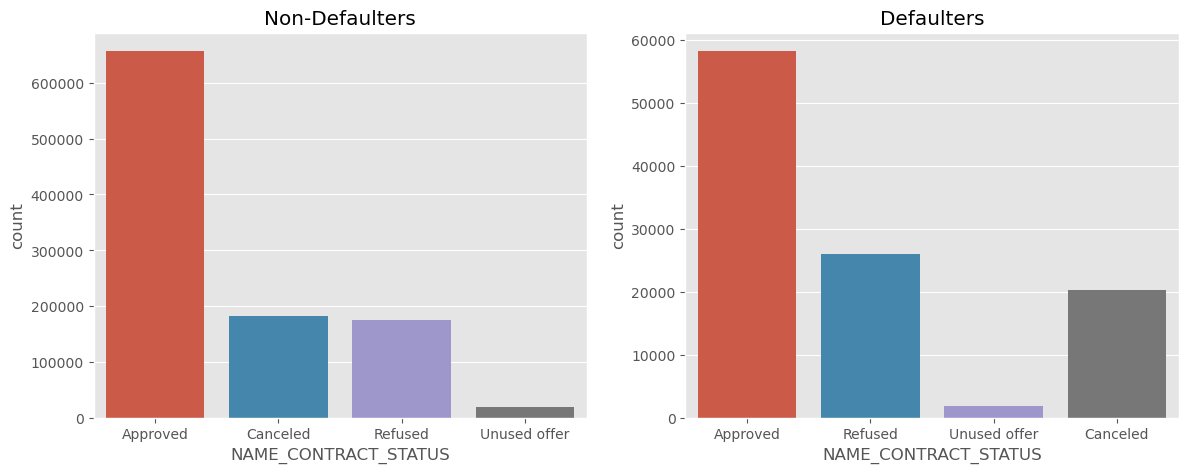

In [78]:
#Plotting NAME_CONTRACT_STATUS for univariate analysis
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)    
ax = sns.countplot(x = 'NAME_CONTRACT_STATUS',data = df3_t0)
plt.title('Non-Defaulters')

plt.subplot(1,2,2) 
ax = sns.countplot(x = 'NAME_CONTRACT_STATUS',data=df3_t1)
plt.title('Defaulters')
plt.show()

**Observation:-**<br>
- **`Approved`** status have highest number of non defaulters followed by **`Cancelled`**.
- Surprisely **`Approved`** status also have highest number of defaulters followed by **`Refused`**,**`Cancelled`** and **`Unused offer`**.

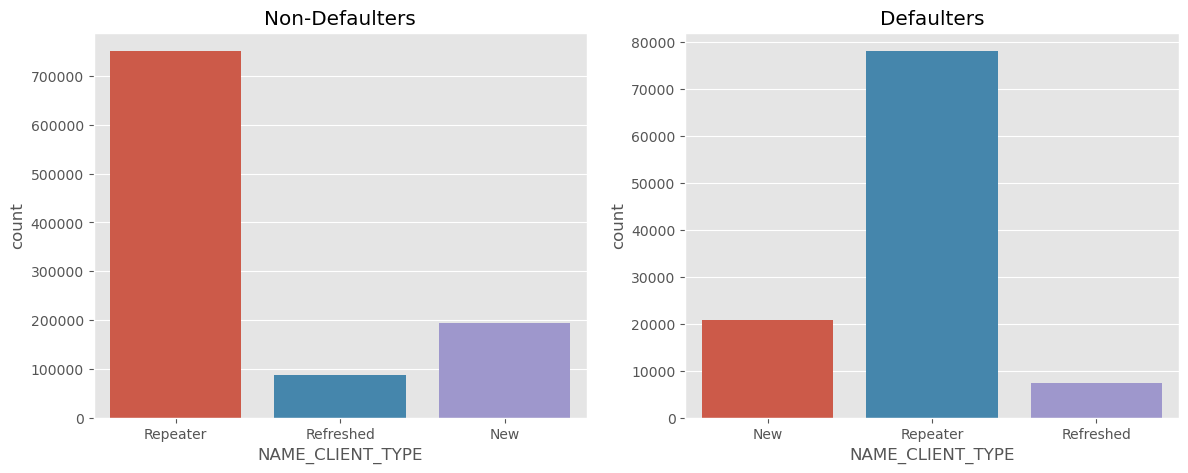

In [79]:
#Plotting NAME_CLIENT_TYPE for univariate analysis

plt.figure(figsize=(14,5))

plt.subplot(1,2,1)    
ax = sns.countplot(x = 'NAME_CLIENT_TYPE',data = df3_t0)
plt.title('Non-Defaulters')

plt.subplot(1,2,2) 
ax = sns.countplot(x = 'NAME_CLIENT_TYPE',data = df3_t1)
plt.title('Defaulters')
plt.show()

**Observation:-**<br>
- Both graph approximately have same pattern but there is huge difference in their counts.
- As expected **`Repeater`**  have highest number of non defaulters and defaulters showing most customers came back for another loan.
- Number of **`New`** Client were greater than **`Refreshed`**.

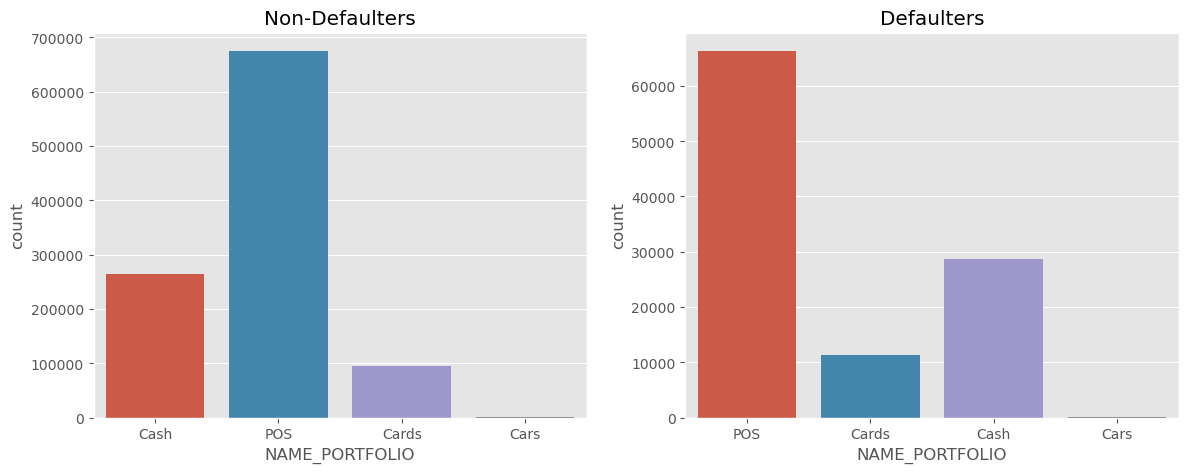

In [80]:
#Plotting NAME_PORTFOLIO for univariate analysis

plt.figure(figsize=(14,5))

plt.subplot(1,2,1)    
ax = sns.countplot(x = 'NAME_PORTFOLIO',data = df3_t0)
plt.title('Non-Defaulters')

plt.subplot(1,2,2) 
ax = sns.countplot(x = 'NAME_PORTFOLIO',data=df3_t1)
plt.title('Defaulters')
plt.show()

**Observation:-**<br>
- Both graph approximately have same pattern but there is huge difference in their counts.
- **`POS`** have highest number of non defaulters and defaulters indicating most loans were taken for **`POS`** .
- **`Cars`** have lowest counts in both graphs indicating very few have taken loan for **`Cars`**

## 19. Bivariate Analysis of merged dataframe

Text(0, 0.5, 'Defaulters')

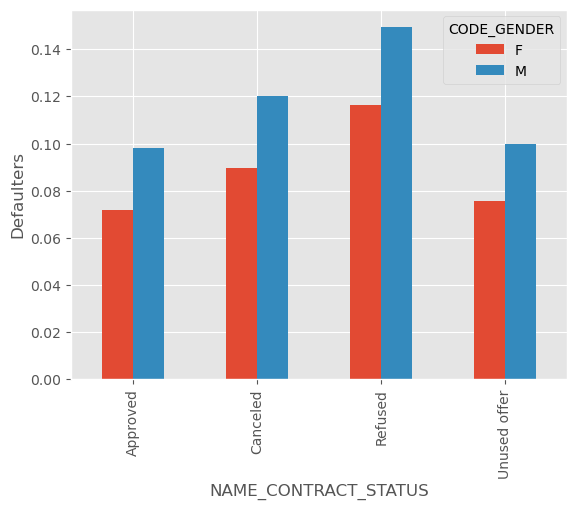

In [81]:
#Plotting NAME_CONTRACT_STATUS VS CODE_GENDER
df3.pivot_table(values='TARGET',index='NAME_CONTRACT_STATUS',columns='CODE_GENDER',aggfunc='mean').plot.bar()
plt.ylabel('Defaulters')

**Observation:-**<br>
- **`Males`** are more likely to default than **`Females`** in all contract status.
- **`Males`** in **`Approved`** and **`Unused offer`** have same defaulting chance.

Text(0, 0.5, 'Defaulters')

<Figure size 1500x1000 with 0 Axes>

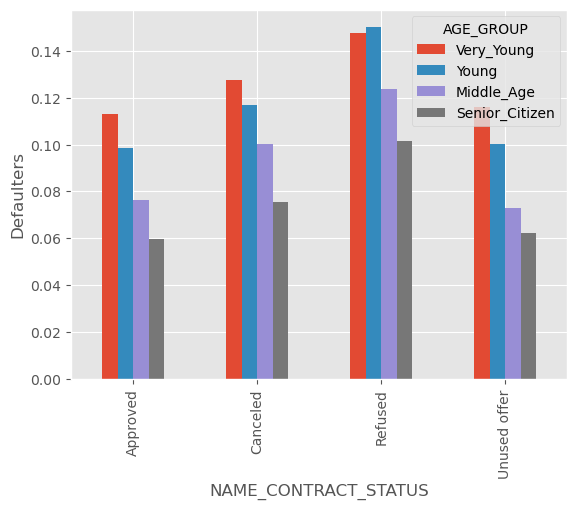

In [82]:
#Plotting NAME_CONTRACT_STATUS VS AGE_GROUP
plt.figure(figsize=(15,10))
df3.pivot_table(values='TARGET',index='NAME_CONTRACT_STATUS',columns='AGE_GROUP',aggfunc='mean').plot.bar()
plt.ylabel('Defaulters')

**Observation:-**<br>
- **`Very_Young`** are more likely to default in all contract status except **`Refused`**.
- **`Senoir_Citizen`** are less likely to default in all contract status.

Text(0, 0.5, 'Defaulters')

<Figure size 800x500 with 0 Axes>

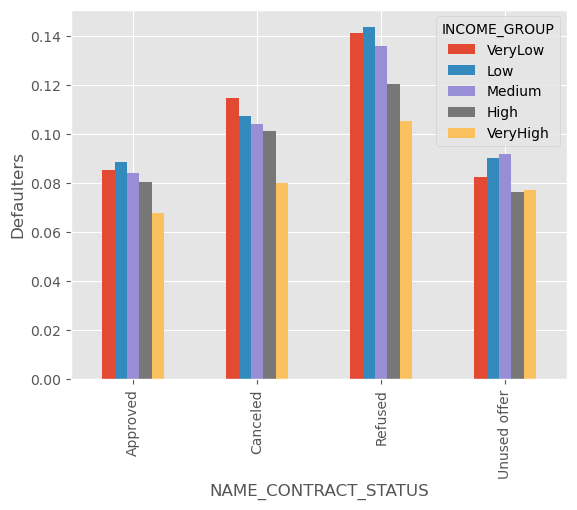

In [83]:
#Plotting NAME_CONTRACT_STATUS VS INCOME_GROUP
plt.figure(figsize=(8,5))
df3.pivot_table(values='TARGET',index='NAME_CONTRACT_STATUS',columns='INCOME_GROUP',aggfunc='mean').plot.bar()
plt.ylabel('Defaulters')

**Observation:-**<br>
- **`Low`** income are more likely to default in all contract status except in **`Unused offer`** and **`Cancelled`**.
- As expected **`VeryHigh`** income group are less likely to default in all contract status.